# Index
[导入模块](#（一）)<br>
[了解数据](#（二）)<br>
[单特征分析](#（三）)<br>
[多特征分析](#（四）)<br>
[创造新特征](#（五）)<br>
[特征编码](#（六）)<br>
[特征选择](#（七）)<br>
[用连续型特征，对比不同算法](#（八）)<br>
[用离散型特征，对比不同算法](#（九）)<br>
[用连续型特征调参](#（十）)<br>
[用离散型特征调参](#（十一）)<br>
[总结](#（十二）)<br>

## （一）
## 导入所需 Python库
[回到顶部](#Index)

In [325]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

## （二）
## 数据集选择的是人口普查数据集，通过链接了解数据集
[回到顶部](#Index)

## 任务目标：建立分类模型预测一个人的收入能否超过五万美元

人口普查数据集: https://archive.ics.uci.edu/ml/datasets/adult

In [2]:
# Load Training and Test Data Sets
headers = ['age', 'workclass', 'fnlwgt',
           'education', 'education-num',
           'marital-status', 'occupation',
           'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country',
           'predclass']
training_raw = pd.read_csv('data_set/adult.data',
                           header=None,
                           names=headers,
                           sep=',\s',
                           na_values=["?"],
                           engine='python')
test_raw = pd.read_csv('data_set/adult.test',
                       header=None,
                       names=headers,
                       sep=',\s',
                       na_values=["?"],
                       engine='python',
                       skiprows=1)

In [3]:
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index', inplace=True, axis=1)
dataset_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* age	年龄	double
* workclass	工作类型	string
* fnlwgt	序号（重量？）	string
* education	教育程度	string
* education_num	受教育时间	double
* maritial_status	婚姻状况	string
* occupation	职业	string
* relationship	关系	string
* race	种族	string
* sex	性别	string
* capital_gain	资本收益	string
* capital_loss	资本损失	string
* hours_per_week	每周工作小时数	double
* native_country	原籍	string
* income	收入	string

## （三）
## 单特征分析
[回到顶部](#Index)

- 关于特征，我们可以分析单特征，也可以分析不同特征之间的关系，首先来看单特征
- 对所有特征进行绘图展示
- 缺失值分析

In [4]:
# 显示所有数值特征的描述性统计
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# 显示所有特征的统计
dataset_raw.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [6]:
dataset_raw.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
predclass         object
dtype: object

In [7]:
# 单特征展示
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    # 设置画板的格式大小
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=wspace, hspace=hspace)
    rows = np.ceil(float(dataset.shape[1])/cols)
    # 循环画子图
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:  # 非数值特征绘制计数图
            graph = sns.countplot(y=column, data=dataset)
            substrings = [label.get_text()[:18]
                          for label in graph.get_yticklabels()]
            graph.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:  # 数值特征绘制直方图
            graph = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

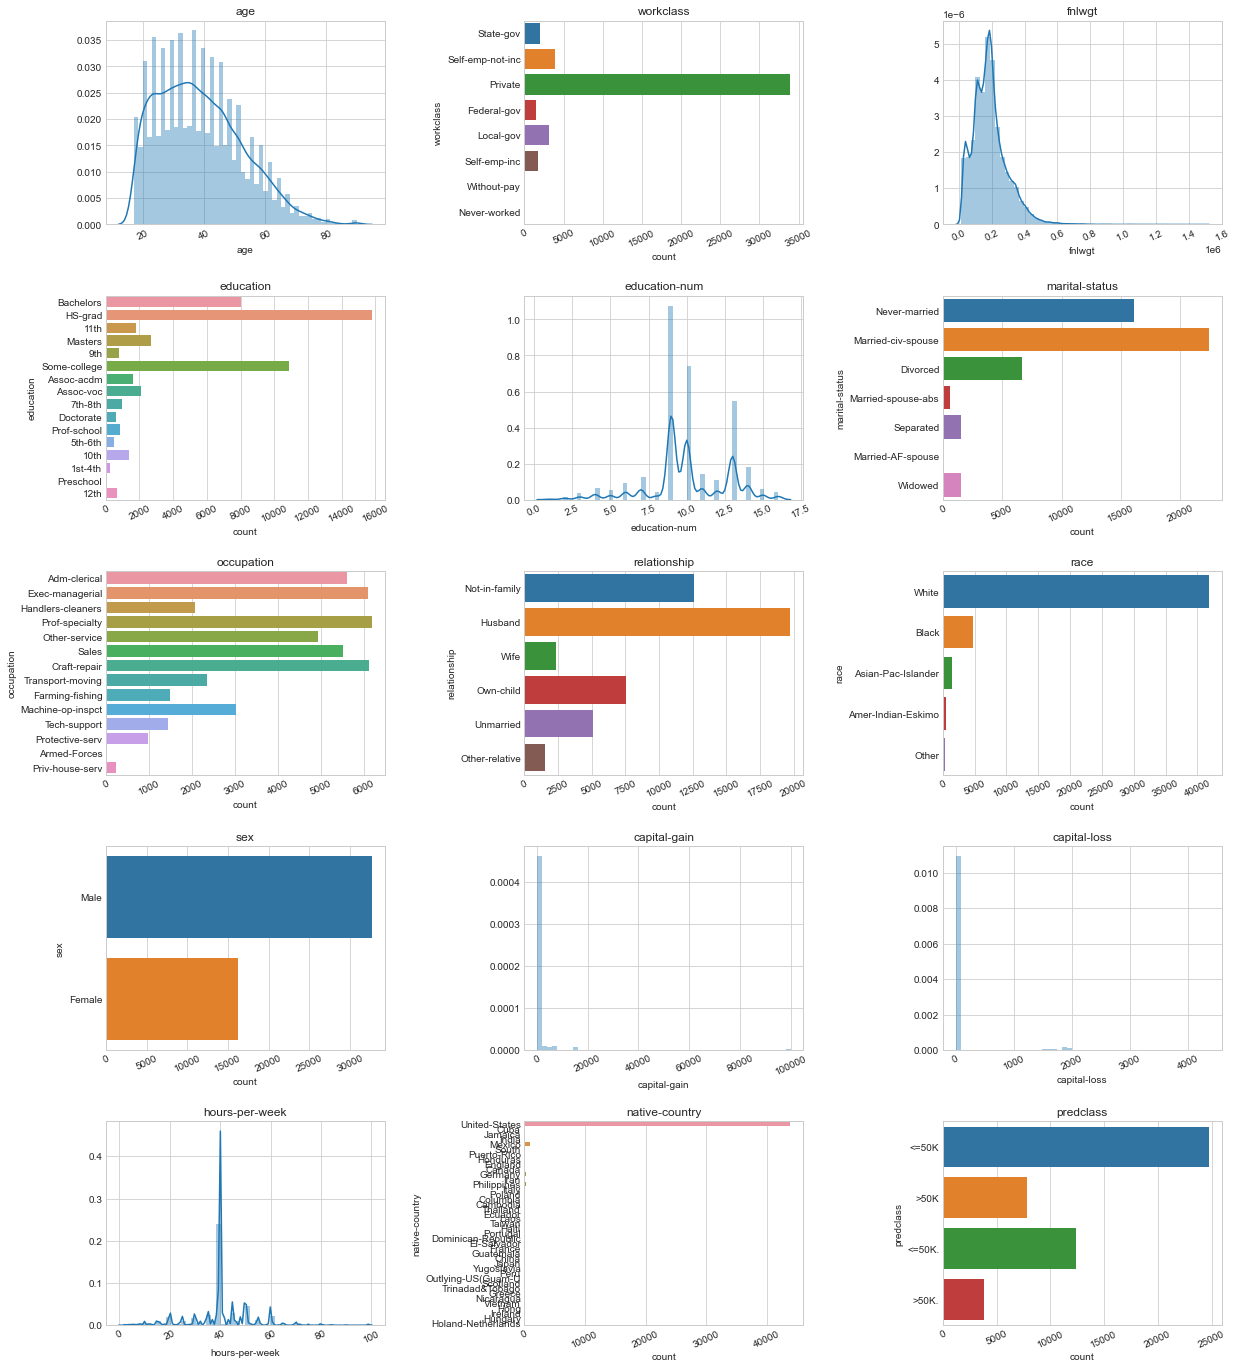

In [8]:
plot_distribution(dataset_raw, cols=3, width=20,
                  height=24, hspace=0.35, wspace=0.5)

In [9]:
# 缺失值检查
dataset_raw.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
predclass            0
dtype: int64

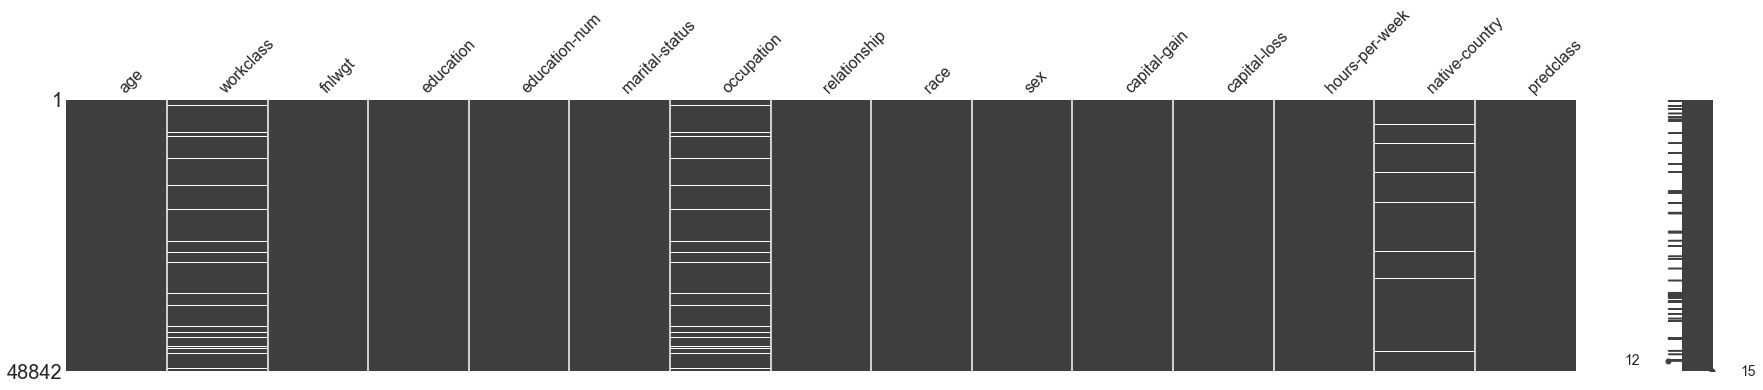

In [10]:
# 缺失值显示
missingno.matrix(dataset_raw, figsize=(30, 5))

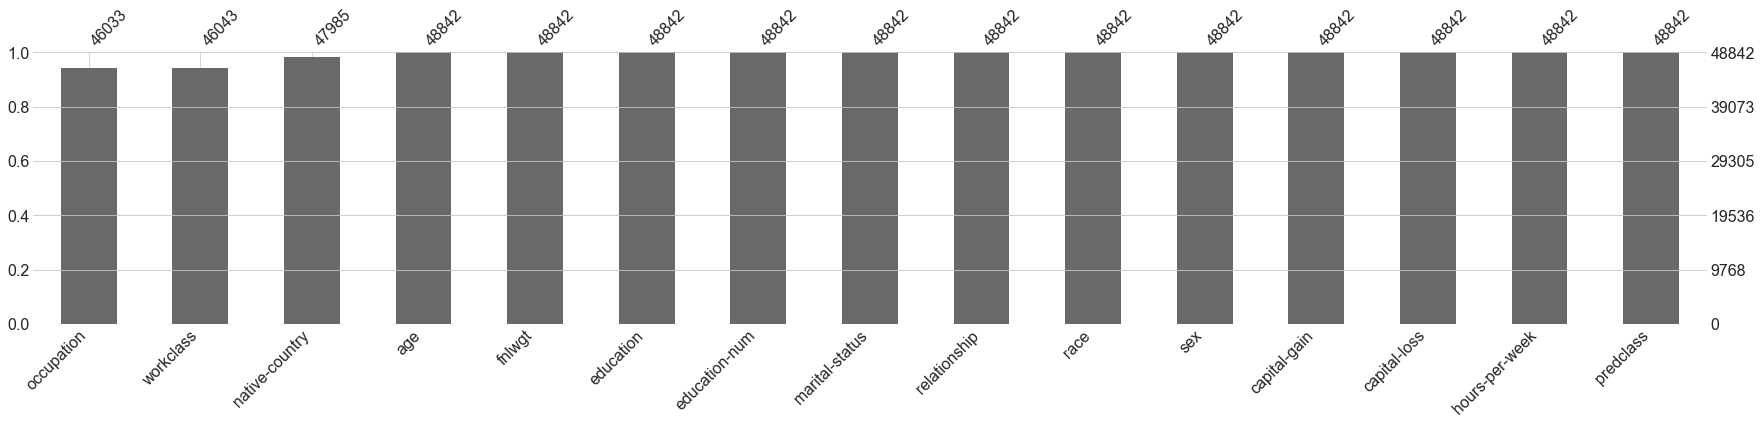

In [11]:
# 有缺失值的特征排前
missingno.bar(dataset_raw, sort='ascending', figsize=(30, 5))

## （四）：数据清洗与特征提取组合

**清洗:**
数据预处理工作:

- **缺失值:** 对缺失值进行填充
- **特殊值:** 一些错误导致的特殊值，例如 ±Inf, NA NaN
- **离群点:** 这些点可能会对结果产生影响，先把它们找出来
- **错误值:** 比如人的年龄不可能出现负数

**特征工程:**
There are multiple techniques for feature engineering:
- **特征分解:** 比如将时间数据2014-09-20T20:45:40Z 转换成天，小时等信息.
- **离散化:** 我们可以选择离散一些我们所拥有的连续变量，因为一些算法会执行得更快。但是会对结果产生什么样的影响呢？需要比较离散和非离散的建模结果

- dataset_bin => 连续值被离散化的数据集
- dataset_con => 非离散化的数据集

- **特征组合:** 将不同的特征组合成一个新特征
    
**缺失值问题:**
我们可以填补缺失值，在许多不同的方式：：

- **额外的数据补充:** 有点难弄
- **均值填充:** 这样可以不改变当前数据集整体的均值
- **回归模型预测:** 建立一个回归模型去得到预测值

## 任务：
- 分别构造连续值与离散值数据集，可以将连续值进行离散化
- 对标签进行编码
- 观察每一个单变量，看看能不能进行组合与筛选（考虑特征属性太多时该不该合并以及离散化）

In [12]:
# 创建两个新的数据集
# To contain our dataframe with our discretised continuous variables
dataset_bin = pd.DataFrame()
dataset_con = pd.DataFrame()  # To contain our dataframe with our continuous variables

### 标签转换

如果收入大于 $50K. 那么就是1 反之就是0

In [13]:
# 处理分类特征
dataset_raw.loc[dataset_raw['predclass'] == '>50K', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '>50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K', 'predclass'] = 0
dataset_raw.loc[dataset_raw['predclass'] == '<=50K.', 'predclass'] = 0

dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

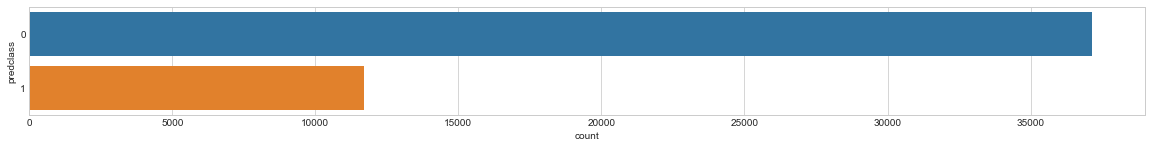

In [14]:
# 查看分类的情况
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 2))
sns.countplot(y='predclass', data=dataset_bin)

### Feature: Age


In [15]:
# 检查年龄有无错误值
print(np.max(dataset_raw['age']), np.min(dataset_raw['age']))

90 17


In [16]:
# 连续型数据集，年龄不作处理
dataset_con['age'] = dataset_raw['age']

In [17]:
# 离散型数据集，年龄切分为10个区间
dataset_bin['age'] = pd.cut(dataset_raw['age'], 10)

In [18]:
dataset_bin['age']

0        (38.9, 46.2]
1        (46.2, 53.5]
2        (31.6, 38.9]
3        (46.2, 53.5]
4        (24.3, 31.6]
             ...     
48837    (38.9, 46.2]
48838    (60.8, 68.1]
48839    (31.6, 38.9]
48840    (38.9, 46.2]
48841    (31.6, 38.9]
Name: age, Length: 48842, dtype: category
Categories (10, interval[float64]): [(16.927, 24.3] < (24.3, 31.6] < (31.6, 38.9] < (38.9, 46.2] ... (60.8, 68.1] < (68.1, 75.4] < (75.4, 82.7] < (82.7, 90.0]]

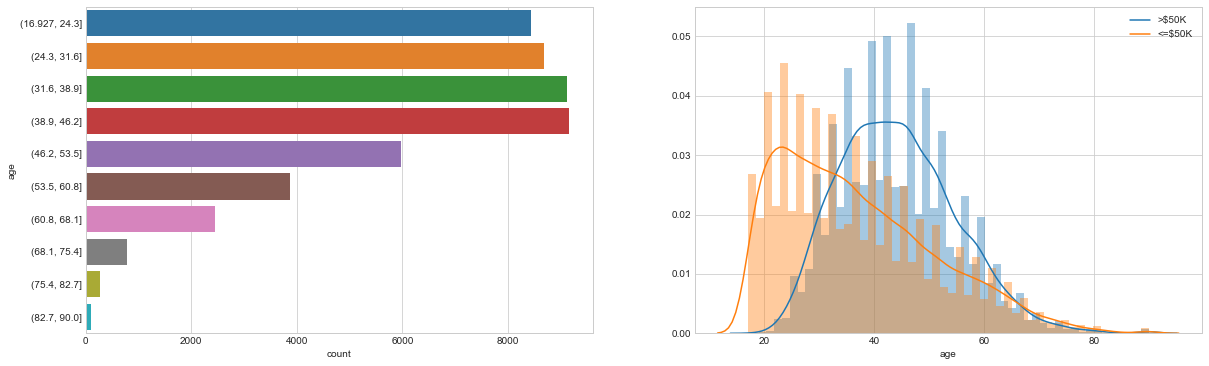

In [19]:
# 左图为切分后年龄分布情况，右图为两种收入分类的年龄分布
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.countplot(y='age', data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con.loc[dataset_con['predclass']
                             == 1]['age'], kde_kws={'label': '>$50K'})
sns.distplot(dataset_con.loc[dataset_con['predclass']
                             == 0]['age'], kde_kws={'label': '<=$50K'})

### Feature: Workclass

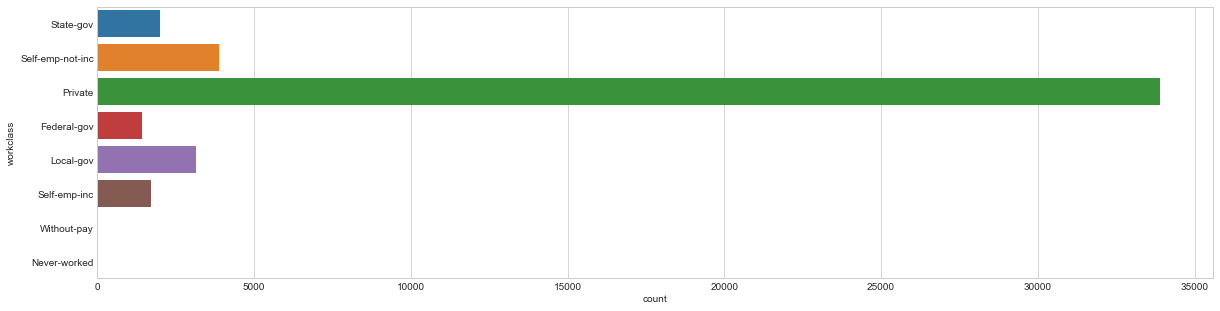

In [20]:
# 工作种类情况
plt.figure(figsize=(20, 5))
sns.countplot(y='workclass', data=dataset_raw)

In [21]:
# 对类似工作种类进行合并
dataset_raw.loc[dataset_raw['workclass'] ==
                'Without-pay', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] ==
                'Never-worked', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] ==
                'Federal-gov', 'workclass'] = 'Fed-gov'
dataset_raw.loc[dataset_raw['workclass'] ==
                'State-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] ==
                'Local-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] ==
                'Self-emp-not-inc', 'workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass'] ==
                'Self-emp-inc', 'workclass'] = 'Self-emp'

dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

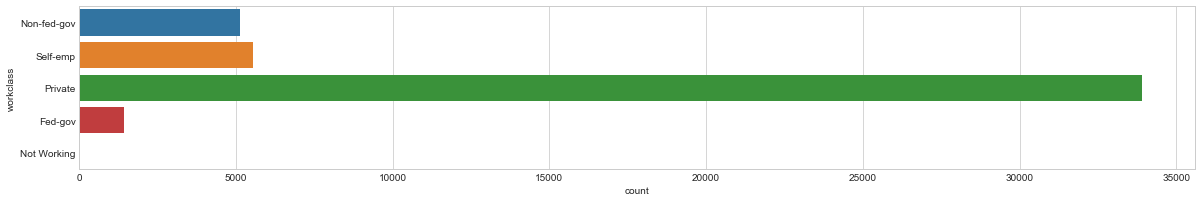

In [22]:
plt.figure(figsize=(20, 3))
sns.countplot(y='workclass', data=dataset_bin)

### Feature: Occupation

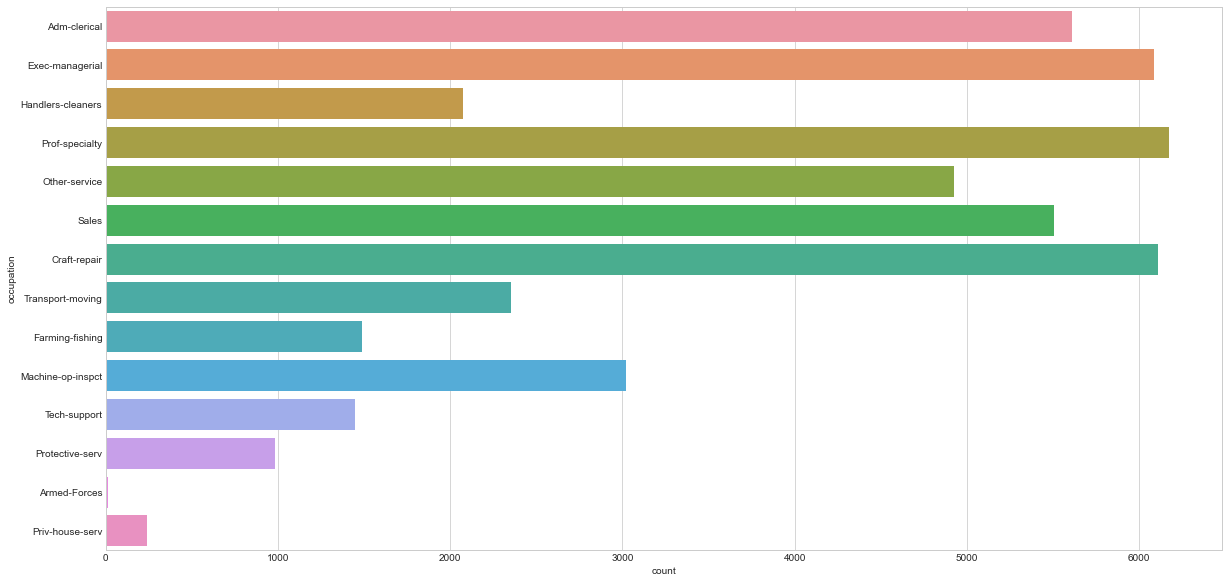

In [23]:
# 职业的分布情况
plt.figure(figsize=(20, 10))
sns.countplot(y='occupation', data=dataset_raw)

In [24]:
# 将相似的职业合并
dataset_raw.loc[dataset_raw['occupation'] ==
                'Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] ==
                'Transport-moving', 'occupation'] = 'Manual Labour'

dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

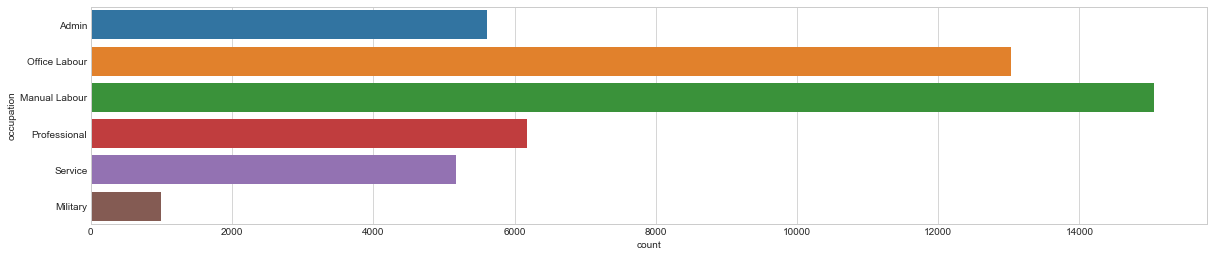

In [25]:
plt.figure(figsize=(20, 4))
sns.countplot(y='occupation', data=dataset_bin)

### Feature: Native Country

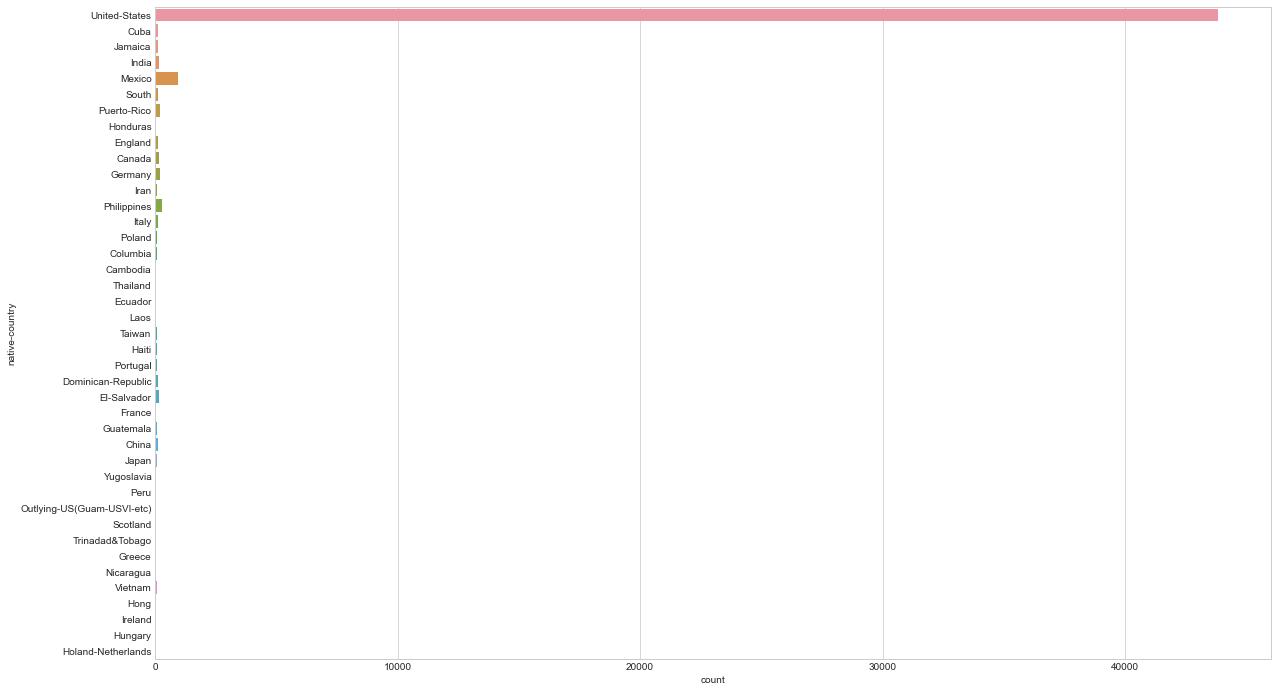

In [26]:
# 原国籍情况
plt.figure(figsize=(20, 12))
sns.countplot(y='native-country', data=dataset_raw)

In [27]:
# 按地缘政治区域合并原国籍
dataset_raw.loc[dataset_raw['native-country']
                == 'Cambodia', 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Canada', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country']
                == 'China', 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Columbia', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Cuba', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Dominican-Republic', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Ecuador', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'El-Salvador', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'England', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] ==
                'France', 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Germany', 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Greece', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Guatemala', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Haiti', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Holand-Netherlands', 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Honduras', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country']
                == 'Hong', 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Hungary', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] ==
                'India', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Iran', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Ireland', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Italy', 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Jamaica', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country']
                == 'Japan', 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country']
                == 'Laos', 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Mexico', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Nicaragua', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Outlying-US(Guam-USVI-etc)', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Peru', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Philippines', 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Poland', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Portugal', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Puerto-Rico', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Scotland', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] ==
                'South', 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country']
                == 'Taiwan', 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country']
                == 'Thailand', 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Trinadad&Tobago', 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] ==
                'United-States', 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country']
                == 'Vietnam', 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] ==
                'Yugoslavia', 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']

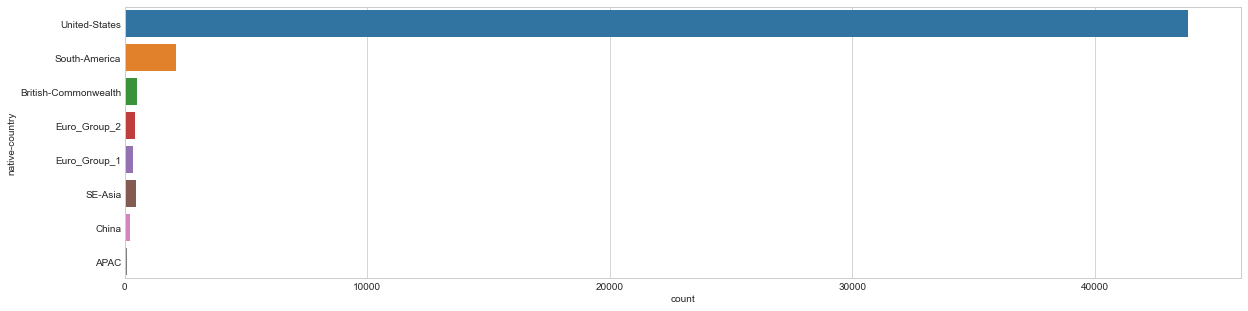

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 5))
sns.countplot(y='native-country', data=dataset_bin)

### Feature: Education

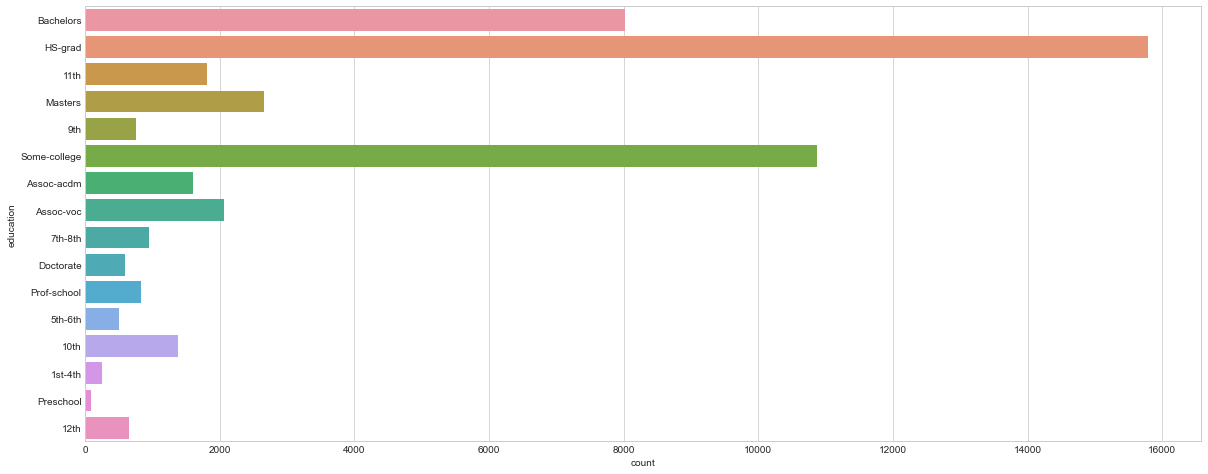

In [29]:
# 受教育程度分布情况
plt.figure(figsize=(20, 8))
sns.countplot(y='education', data=dataset_raw)

In [30]:
# 合并受教育程序
dataset_raw.loc[dataset_raw['education'] == '10th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] ==
                'Assoc-acdm', 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] ==
                'Assoc-voc', 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] ==
                'Bachelors', 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] ==
                'Doctorate', 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] ==
                'HS-grad', 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters', 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] ==
                'Preschool', 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] ==
                'Prof-school', 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] ==
                'Some-college', 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

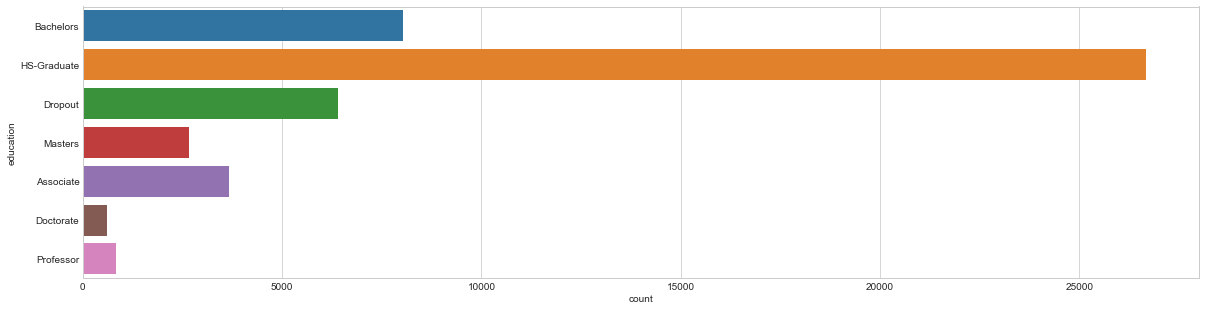

In [31]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(y='education', data=dataset_bin)

### Feature: Marital Status

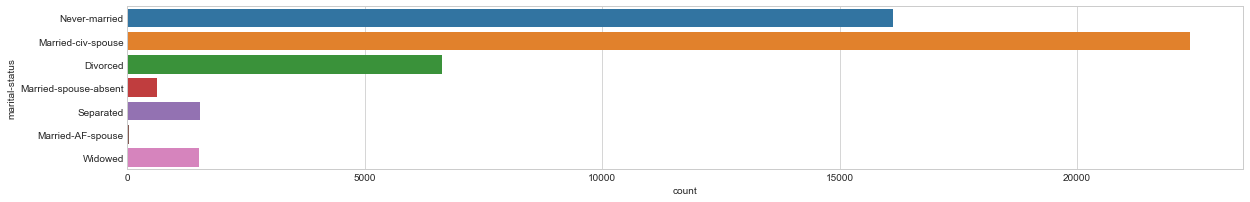

In [32]:
# 婚姻状况
plt.figure(figsize=(20, 3))
sns.countplot(y='marital-status', data=dataset_raw)

In [33]:
# 合并相似的婚姻状态
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Never-married', 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Married-AF-spouse', 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Married-civ-spouse', 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Separated', 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] ==
                'Divorced', 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status']
                == 'Widowed', 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

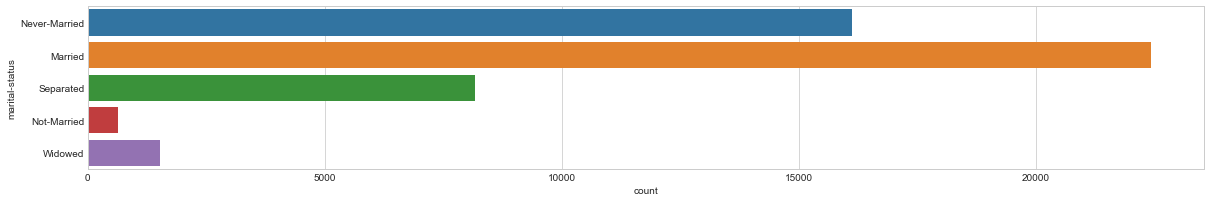

In [34]:
fig = plt.figure(figsize=(20, 3))
sns.countplot(y='marital-status', data=dataset_bin)

### Feature: Final Weight

In [35]:
# 切分为10份
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']

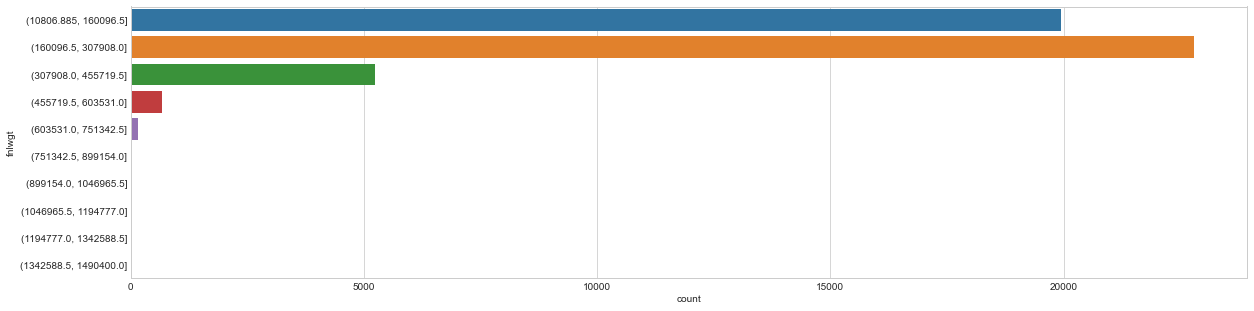

In [36]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(y='fnlwgt', data=dataset_bin)

### Feature: Education Number

In [37]:
# 受教育年限切分为10份
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'], 10)
dataset_con['education-num'] = dataset_raw['education-num']

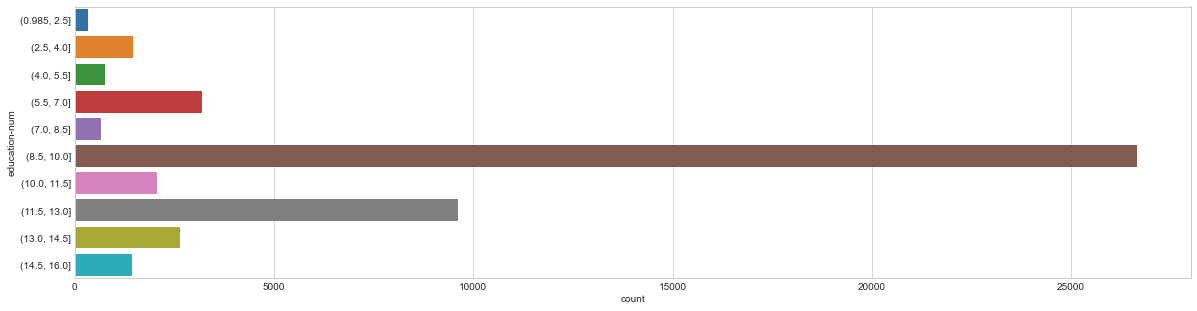

In [38]:
fig = plt.figure(figsize=(20, 5))
sns.countplot(y='education-num', data=dataset_bin)

### Feature: Hours per Week

In [39]:
# 每周工作小时数，切分10份
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10)
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

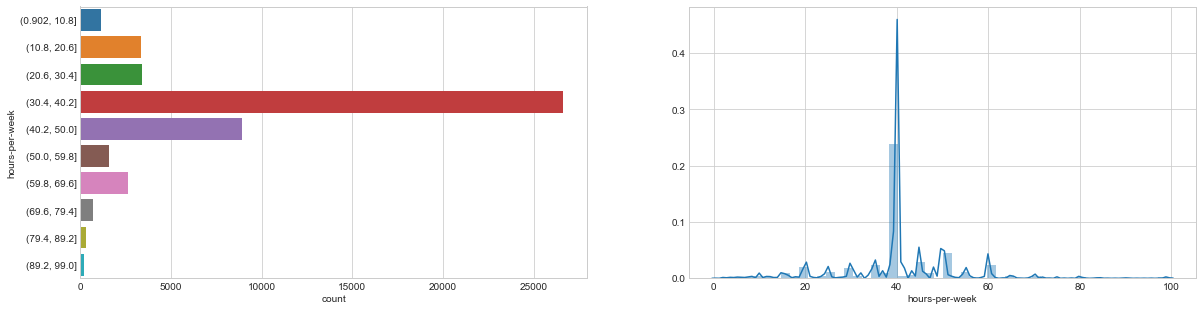

In [40]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.countplot(y='hours-per-week', data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['hours-per-week'])

### Feature: Capital Gain

In [41]:
# 资本收益，切分为5份
dataset_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 5)
dataset_con['capital-gain'] = dataset_raw['capital-gain']

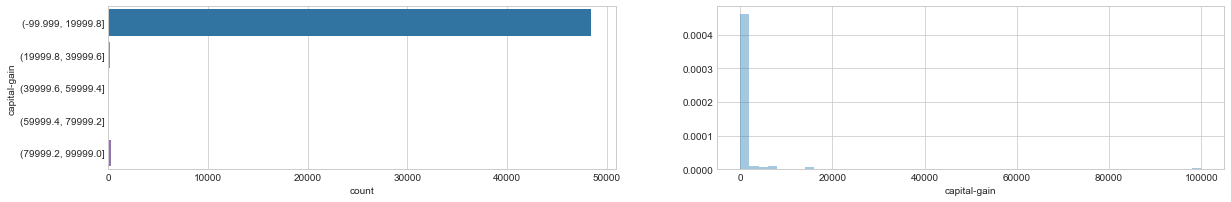

In [42]:
fig = plt.figure(figsize=(20, 3))
plt.subplot(121)
sns.countplot(y='capital-gain', data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['capital-gain'])

### Feature: Capital Loss

In [43]:
# 冷酷损失，切分为5份
dataset_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 5)
dataset_con['capital-loss'] = dataset_raw['capital-loss']

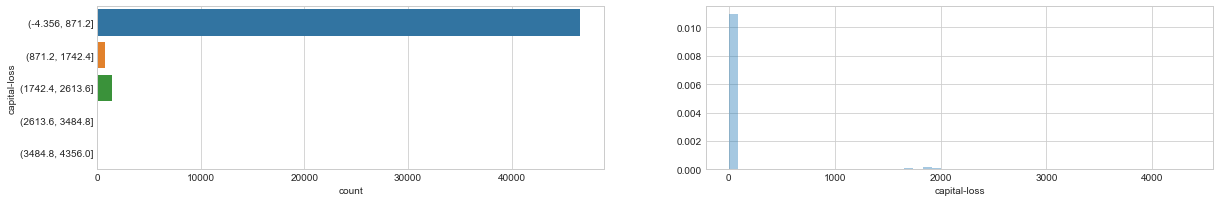

In [44]:
fig = plt.figure(figsize=(20, 3))
plt.subplot(121)
sns.countplot(y='capital-loss', data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con['capital-loss'])

### Features: Race, Sex, Relationship

In [45]:
# 种族、性别、关系直接使用
dataset_bin['race'] = dataset_con['race'] = dataset_raw['race']
dataset_bin['sex'] = dataset_con['sex'] = dataset_raw['sex']
dataset_bin['relationship'] = dataset_con['relationship'] = dataset_raw['relationship']

## （四）
## 绘制展示多个变量之间的关系
[回到顶部](#Index)

- 在不同类别属性上观察两种标签的分布情况
- 观察两个相关属性对收入的影响

### 双变量分析

In [46]:
# 在不同类别属性上观察两种标签的分布情况
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    # 设置画板样式
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=wspace, hspace=hspace)
    rows = np.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        # 绘制非数值特征的不同收入的情况
        if dataset.dtypes[column] == np.object:
            graph = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [label.get_text()[:10]
                          for label in graph.get_yticklabels()]
            graph.set(yticklabels=substrings)

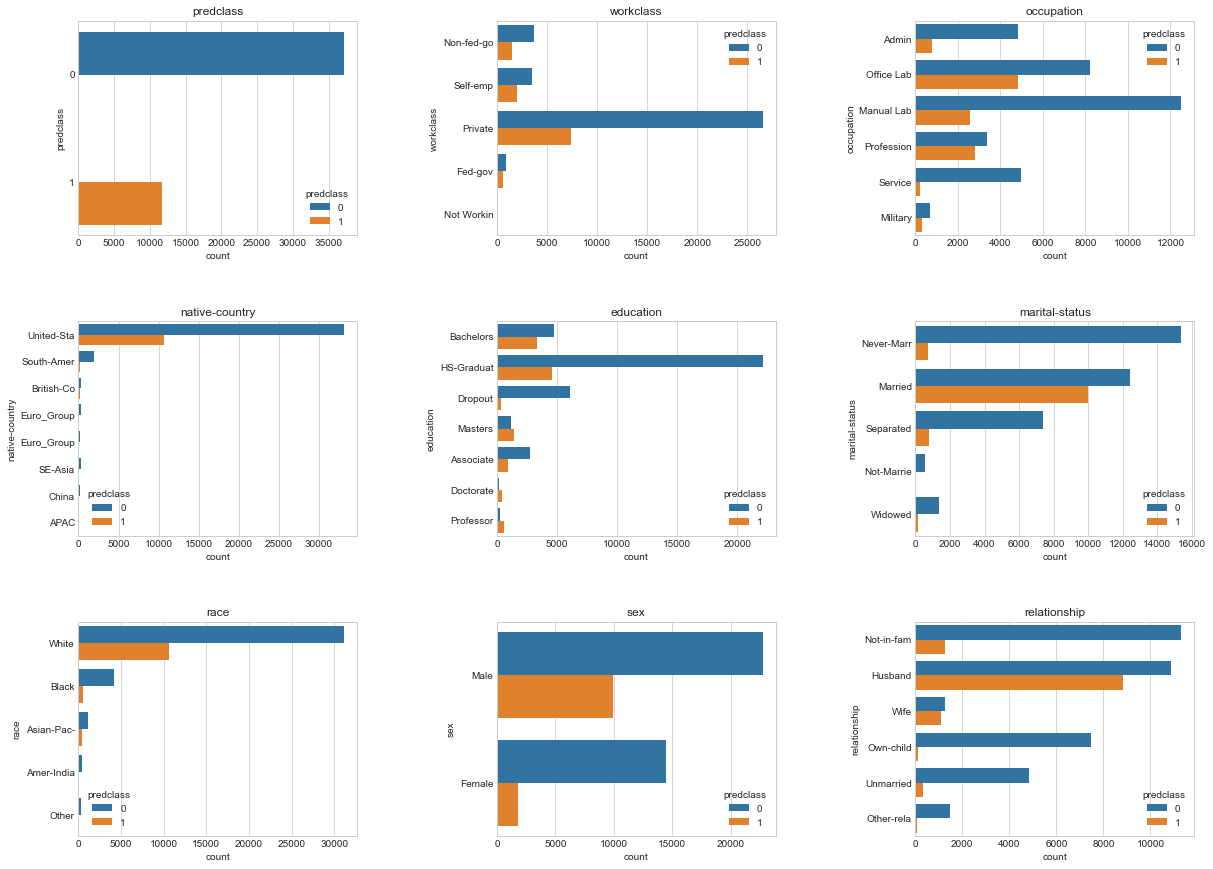

In [47]:
plot_bivariate_bar(dataset_bin, hue='predclass', cols=3,
                   width=20, height=15, hspace=0.4, wspace=0.5)

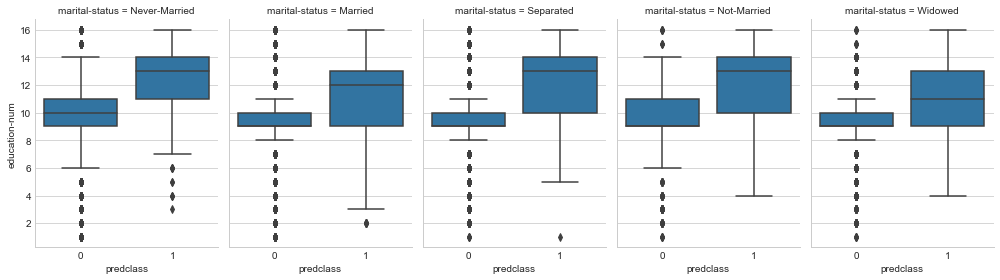

In [48]:
# 婚姻状况和教育年限对收入的影响
g = sns.FacetGrid(dataset_con, col='marital-status', size=4, aspect=0.7)
g.map(sns.boxplot, 'predclass', 'education-num')

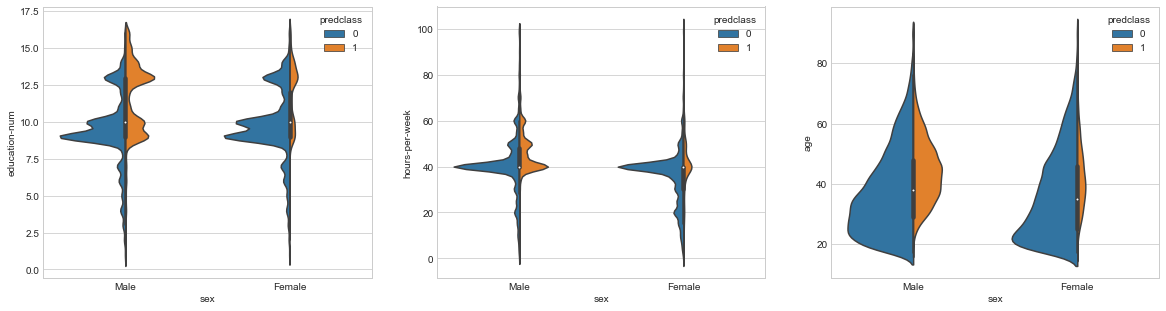

In [49]:
# 两种性别下，教育、每周工时、年龄对收入的影响
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
sns.violinplot(x='sex', y='education-num', hue='predclass',
               data=dataset_con, split=True, scale='count')

plt.subplot(132)
sns.violinplot(x='sex', y='hours-per-week', hue='predclass',
               data=dataset_con, split=True, scale='count')

plt.subplot(133)
sns.violinplot(x='sex', y='age', hue='predclass',
               data=dataset_con, split=True, scale='count')

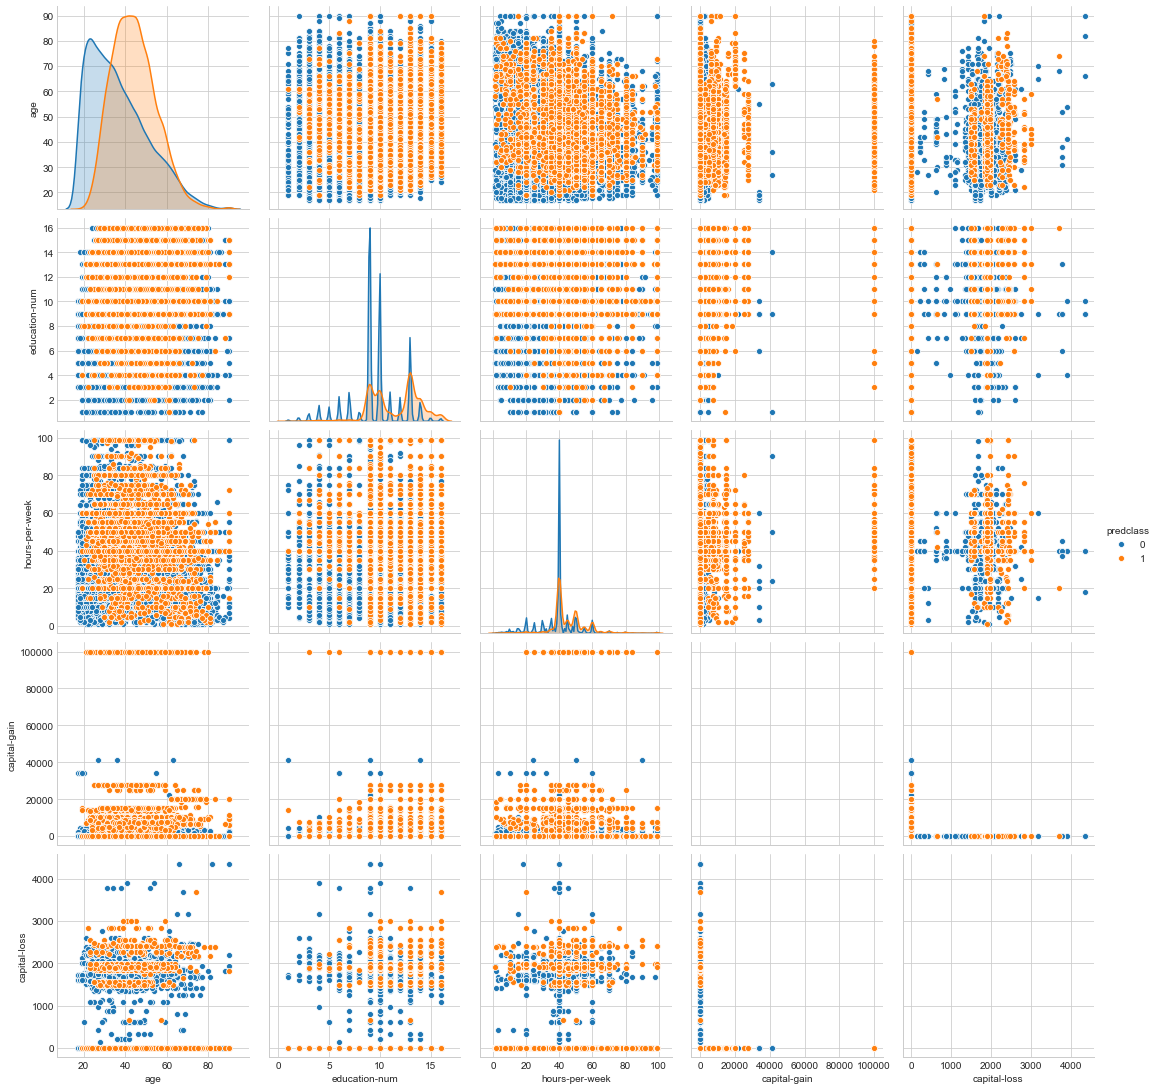

In [50]:
# 不同特征之间的散点图分布
sns.pairplot(dataset_con[['age', 'education-num', 'hours-per-week', 'predclass',
                          'capital-gain', 'capital-loss']], hue='predclass', diag_kind='kde', size=3)

## （五）
## 创造新特征，比如工龄
[回到顶部](#Index)

In [51]:
# 每周工作时间*年龄的新特征
dataset_con['age-hours'] = dataset_con['age']*dataset_con['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_con['age-hours'], 10)
dataset_con['age-hours'] = dataset_con['age-hours']

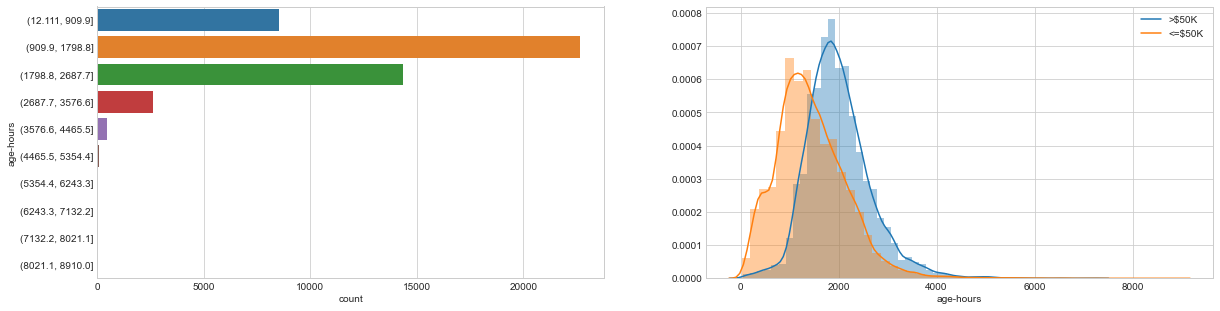

In [52]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.countplot(y='age-hours', data=dataset_bin)
plt.subplot(122)
sns.distplot(dataset_con.loc[dataset_con['predclass']
                             == 1]['age-hours'], kde_kws={'label': '>$50K'})
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 0]
             ['age-hours'], kde_kws={'label': '<=$50K'})

In [53]:
# 性别与婚姻状况的组合特征
dataset_bin['sex-marital'] = dataset_con['sex-marital'] = dataset_con['sex'] + \
    dataset_con['marital-status']

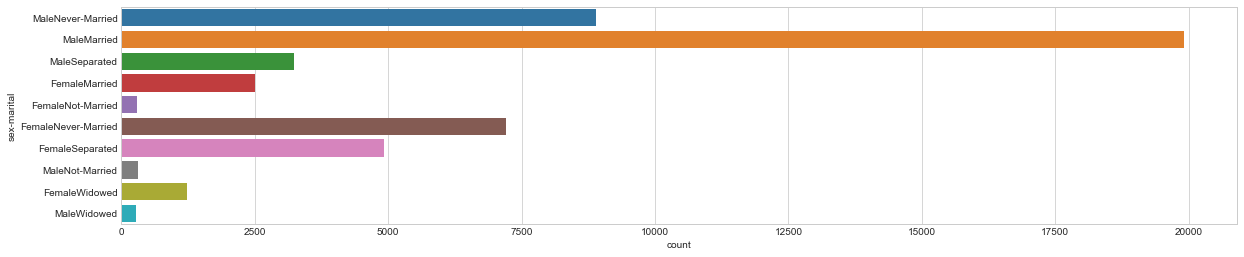

In [54]:
fig = plt.figure(figsize=(20, 4))
sns.countplot(y='sex-marital', data=dataset_bin)

## （六）
## 对特征进行编码
[回到顶部](#Index)

对特征进行编码，因为机器学习只认识数字，可以使用pd.get_dummies(dataset_bin, columns=one_hot_cols)

Additional Resources: http://pbpython.com/categorical-encoding.html

In [55]:
# 独热编码化
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols

['predclass',
 'age',
 'workclass',
 'occupation',
 'native-country',
 'education',
 'marital-status',
 'fnlwgt',
 'education-num',
 'hours-per-week',
 'capital-gain',
 'capital-loss',
 'race',
 'sex',
 'relationship',
 'age-hours',
 'sex-marital']

In [56]:
one_hot_cols.remove('predclass')
dataset_bin_enc = pd.get_dummies(dataset_bin, columns=one_hot_cols)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleNot-Married,sex-marital_MaleSeparated,sex-marital_MaleWidowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
dataset_con.dtypes

predclass         object
age                int64
workclass         object
occupation        object
native-country    object
education         object
marital-status    object
fnlwgt             int64
education-num      int64
hours-per-week     int64
capital-gain       int64
capital-loss       int64
race              object
sex               object
relationship      object
age-hours          int64
sex-marital       object
dtype: object

In [58]:
# 标签化
dataset_con_test = dataset_con

dataset_con_test['workclass'] = dataset_con['workclass'].factorize()[0]
dataset_con_test['occupation'] = dataset_con['occupation'].factorize()[0]
dataset_con_test['native-country'] = dataset_con['native-country'].factorize()[0]
# dataset_con_test['marital-status'] = dataset_con['marital-status'].factorize()[0]
# dataset_con_test['race'] = dataset_con['race'].factorize()[0]
# dataset_con_test['sex'] = dataset_con['sex'].factorize()[0]
# dataset_con_test['relationship'] = dataset_con['relationship'].factorize()[0]
# dataset_con_test['sex-marital'] = dataset_con['sex-marital'].factorize()[0]

In [59]:
dataset_con_test['native-country'].value_counts()

 0    43832
 1     2095
-1      857
 2      518
 5      462
 3      419
 4      350
 6      217
 7       92
Name: native-country, dtype: int64

In [60]:
dataset_con_enc = dataset_con_test.apply(LabelEncoder().fit_transform)
dataset_con_enc.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,race,sex,relationship,age-hours,sex-marital
0,0,22,1,1,1,1,1,3461,12,39,27,0,4,1,1,695,6
1,0,33,2,2,1,1,0,3788,12,12,0,0,4,1,0,334,5
2,0,21,3,3,1,4,3,18342,8,39,0,0,4,1,1,683,8
3,0,36,3,3,1,3,0,19995,6,39,0,0,2,1,0,890,5
4,0,11,3,4,2,1,0,25405,12,39,0,0,2,0,5,530,0


## （七）
## 特征选择，可以参考下述方法
[回到顶部](#Index)

特征多并不代表都是好用的，咱们得来挑一挑，哪些比较有价值，这样才给他留下来

- **降维:**
    - **主成分分析 (PCA):** 降维最常用的手段，需要指定基坐标系，然后变换到指定的维度
    - **奇异值分解(SVD):** 找出来有具有特定含义的特征
    - **线性判别分析(LDA):** 拿到最适合分类的特征空间


- **特征重要性/相关性:**
    - **筛选:** 找出来哪些对结果最能产生影响的特正门
    - **评估子集:** 用部分特征数据进行实验
    - **集成方法:** 类似随机森林
    - **特征相关性:** 两个随机变量共同变化的相关度量。特征应该彼此不相关，同时与我们试图预测的特性高度相关。

### 特征相关性

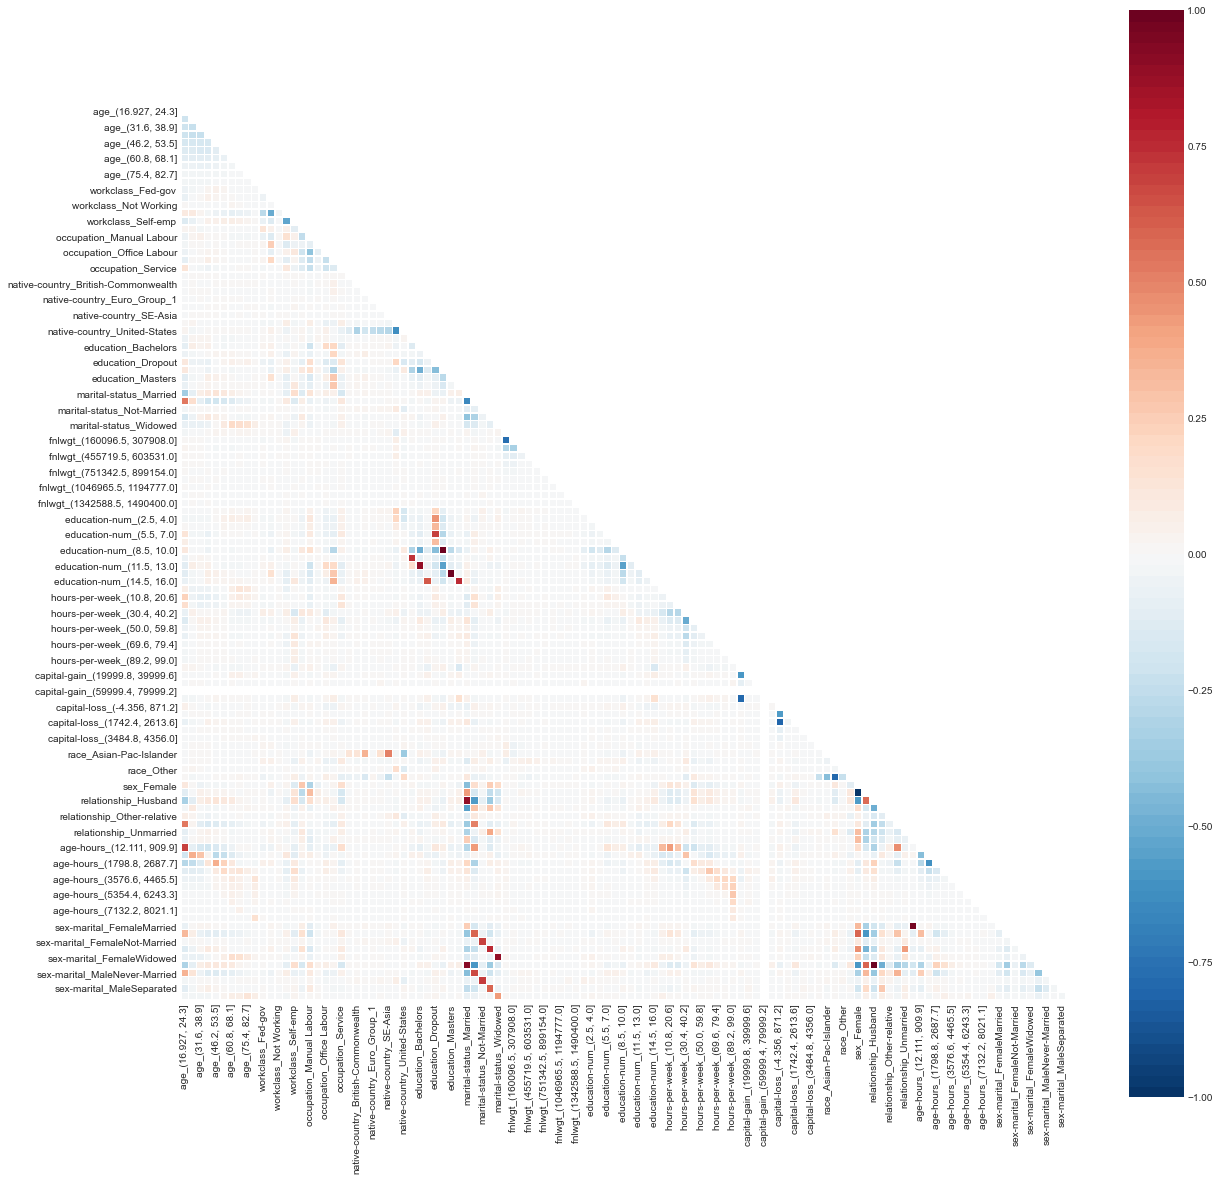

In [61]:
# 两个随机变量共同变化的相关度量。特征应该彼此不相关，同时与我们试图预测的特性高度相关。
# 创建离散型数据集的相关图
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 20))

mask = np.zeros_like(dataset_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_bin_enc.corr(),
            vmin=-1, vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r", 100),
            mask=mask,
            linewidths=.5)

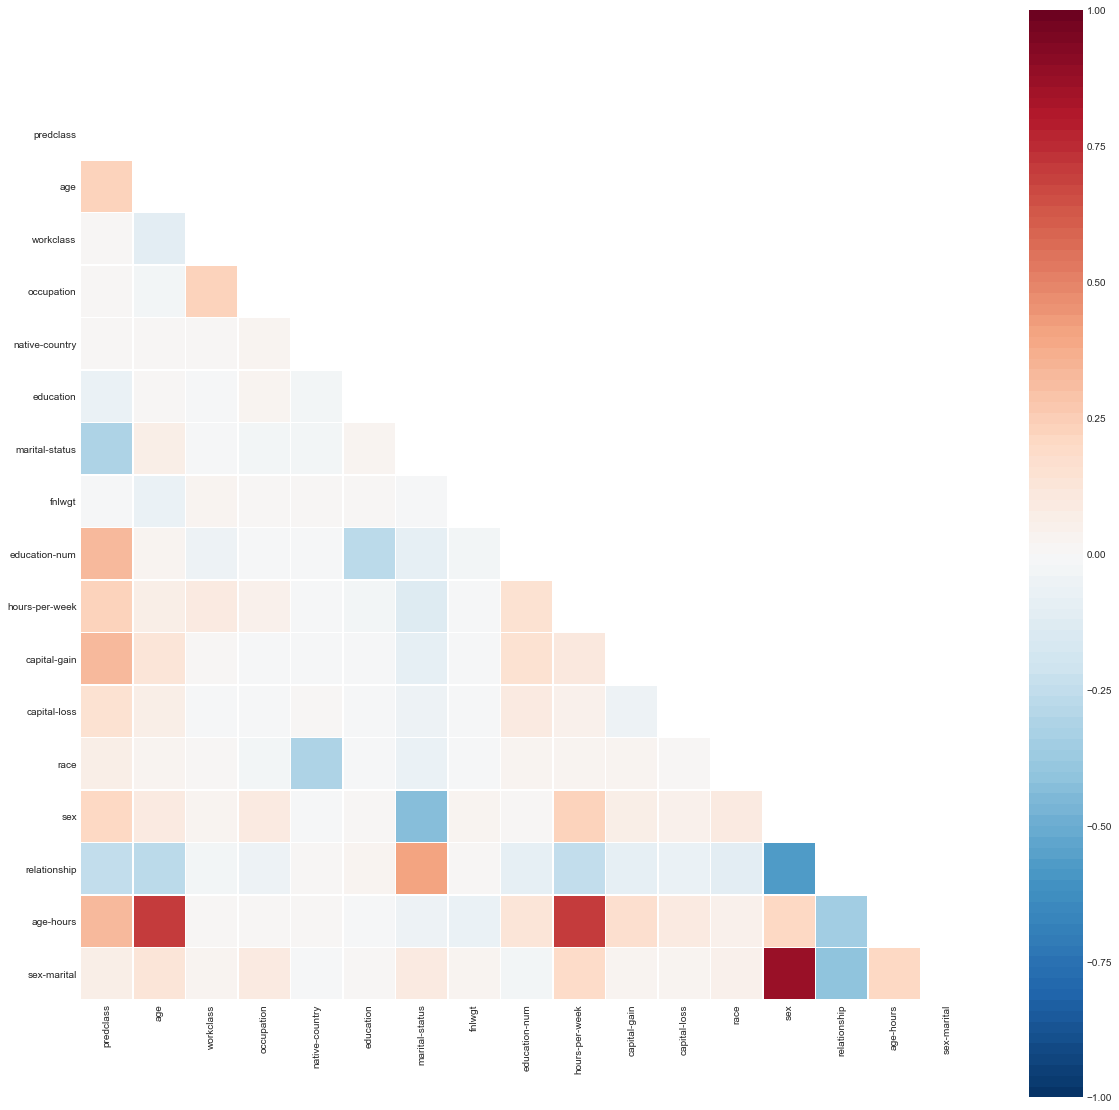

In [62]:
# 创建连续型数据集的相关图
fig = plt.figure(figsize=(20, 20))
mask = np.zeros_like(dataset_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset_con_enc.corr(),
            vmin=-1, vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r", 100),
            mask=mask,
            linewidths=.5);

### 特征重要性

#### 随机森林评估特征重要性

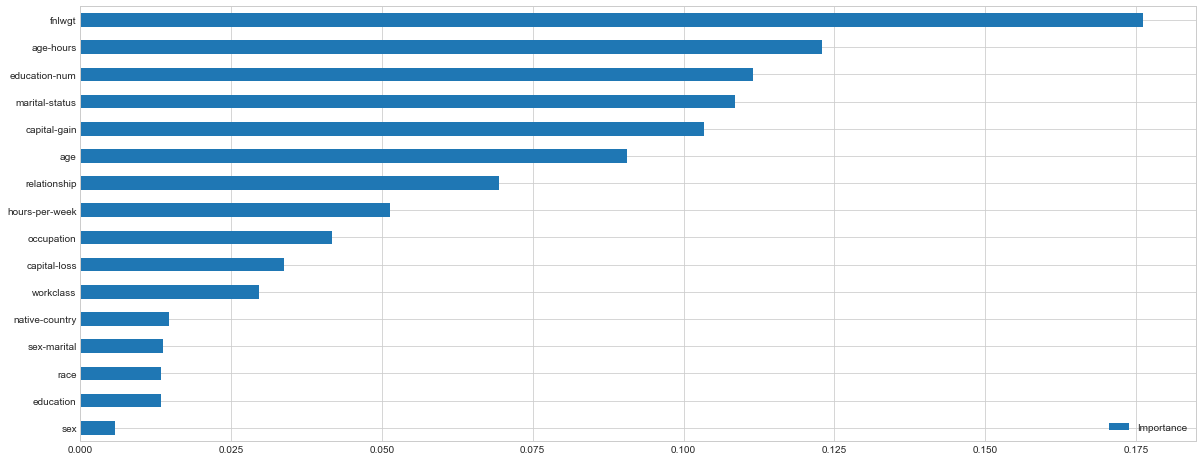

In [63]:
# 基于随机森林来进行特征重要性的评估，连续型数据
rfc = RandomForestClassifier()
rfc.fit(dataset_con_enc.drop('predclass', axis=1),
        dataset_con_enc['predclass'])

importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=dataset_con_enc.drop(
    'predclass', axis=1).columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(
    kind='barh', figsize=(20, len(importance)/2))

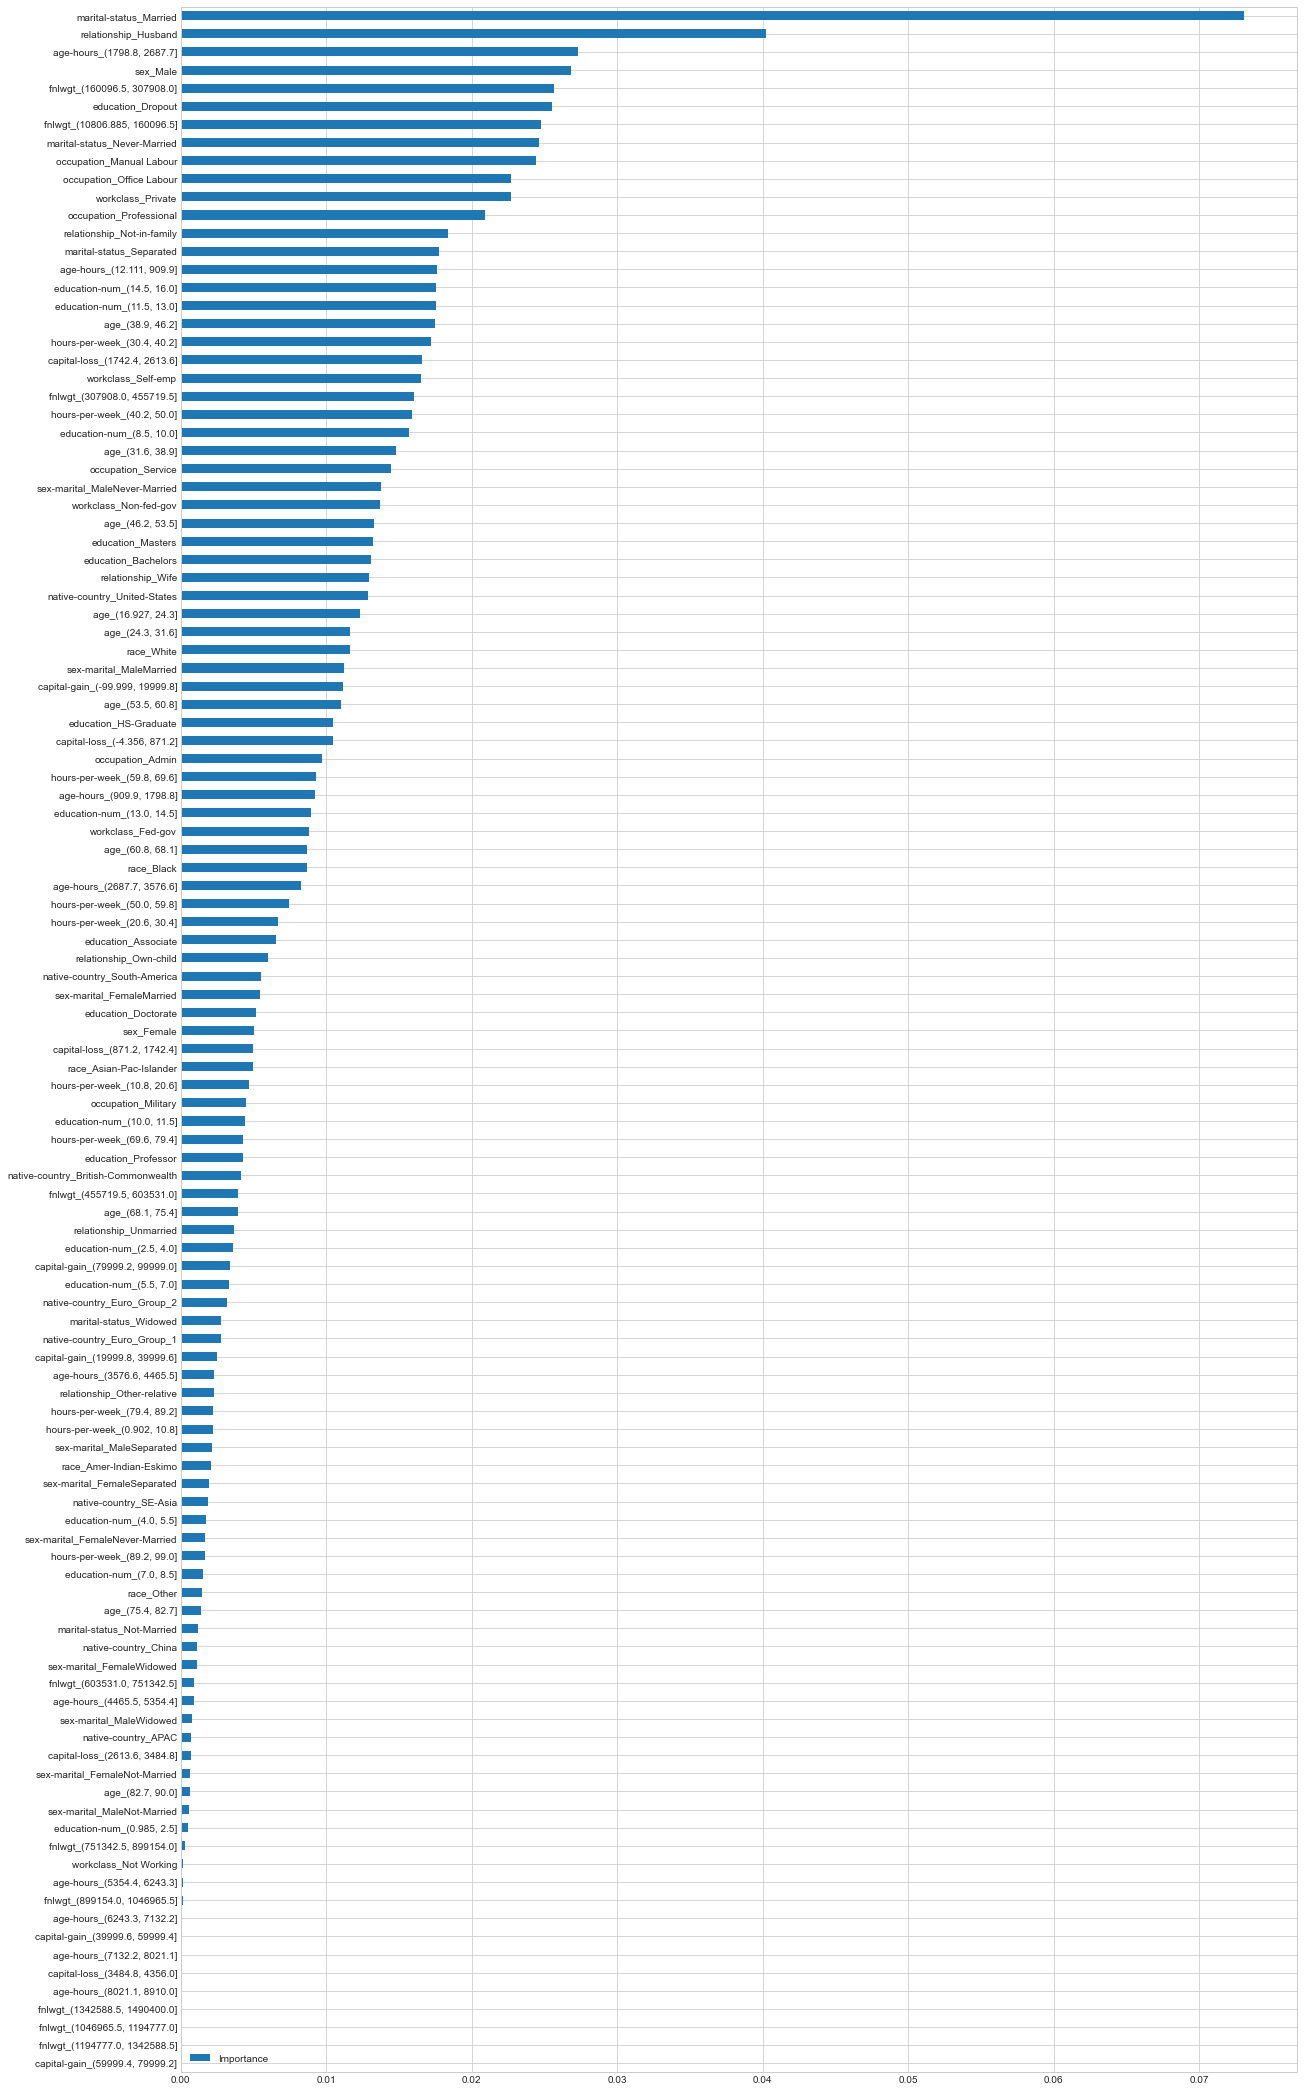

In [102]:
# 基于随机森林来进行特征重要性的评估，离散型数据
rfc = RandomForestClassifier()
dataset_bin_enc['predclass'] = dataset_bin_enc['predclass'].astype('int')
rfc.fit(dataset_bin_enc.drop('predclass', axis=1),
        dataset_bin_enc['predclass'])

importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=dataset_bin_enc.drop(
    'predclass', axis=1).columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(
    kind='barh', figsize=(20, len(importance)/3))

#### PCA评估特征重要性

到底降不降维？没有一个固定的说法，在机器学习中没有说一个算法一个方案就一定对的，我们需要尝试

涉及参数：
* n_components：这个参数可以帮我们指定希望PCA降维后的特征维度数目。最常用的做法是直接指定降维到的维度数目，此时n_components是一个大于等于1的整数。当然，我们也可以指定主成分的方差和所占的最小比例阈值，让PCA类自己去根据样本特征方差来决定降维到的维度数，此时n_components是一个（0，1]之间的数

* whiten ：判断是否进行白化。所谓白化，就是对降维后的数据的每个特征进行归一化，让方差都为1.对于PCA降维本身来说，一般不需要白化。如果你PCA降维后有后续的数据处理动作，可以考虑白化。默认值是False，即不进行白化。 

* 除了这些输入参数外，有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [64]:
# 用PCA降级两个数据集
X1 = preprocessing.StandardScaler().fit_transform(
    dataset_bin_enc.drop('predclass', axis=1))
pca1 = PCA(n_components=len(dataset_bin_enc.columns)-1)
fit1 = pca1.fit(X1)

X2 = preprocessing.StandardScaler().fit_transform(
    dataset_con_enc.drop('predclass', axis=1))
pca2 = PCA(n_components=len(dataset_con_enc.columns)-2)
fit2 = pca2.fit(X2)

<BarContainer object of 15 artists>

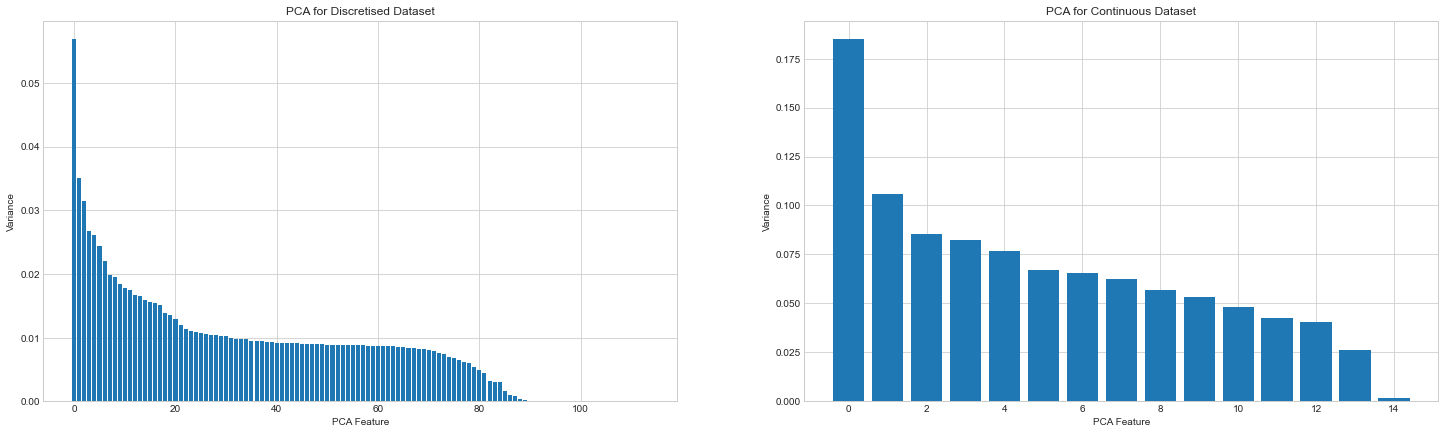

In [67]:
# 显示降级后的特征的方差
plt.figure(figsize=(25, 7))

plt.subplot(121)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(fit1.explained_variance_ratio_.size),
        fit1.explained_variance_ratio_)

plt.subplot(122)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(fit2.explained_variance_ratio_.size),
        fit2.explained_variance_ratio_)

In [78]:
# 显示连续型数据集PCA降维后，2D,3D图
X = preprocessing.StandardScaler().fit_transform(
    dataset_con_enc.drop('predclass', axis=1))
y = dataset_con_enc['predclass']

# 设备格式
target_name = [0, 1]
colors = ['navy', 'darkorange']
lw = 2
alpha = .2

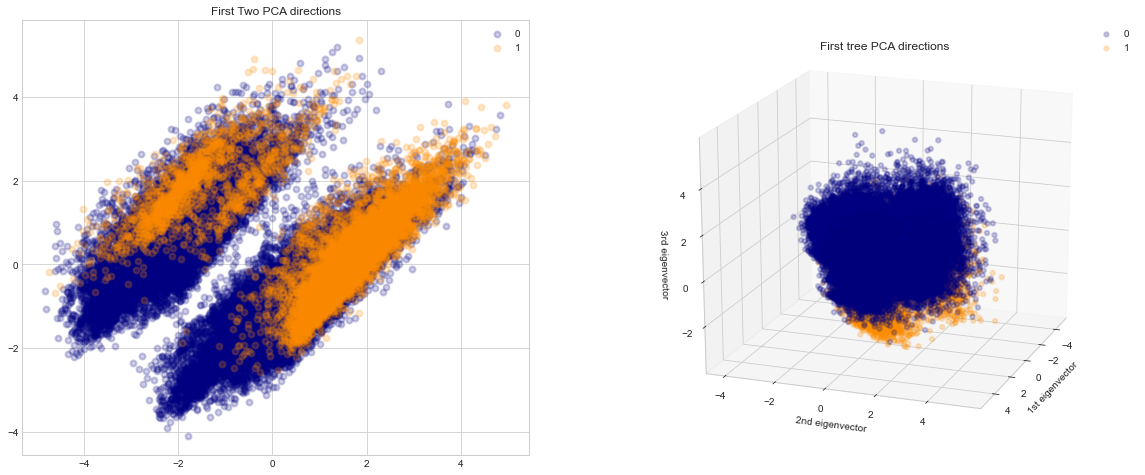

In [79]:
# 绘制二维图
plt.figure(2, figsize=(20, 8))

plt.subplot(121)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_name):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color,
                alpha=alpha, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First Two PCA directions')

# 绘制三维图
ax = plt.subplot(1, 2, 2, projection='3d')
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y ==
                                                                     i, 2], color=color, alpha=alpha, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('First tree PCA directions')
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector')
ax.set_zlabel('3rd eigenvector')

# 旋转角度
ax.view_init(20, 20)

In [106]:
# 显示离散型数据集PCA降维后，2D,3D图
X = preprocessing.StandardScaler().fit_transform(
    dataset_bin_enc.drop('predclass', axis=1))
y = dataset_bin_enc['predclass']

# 设备格式
target_name = [0, 1]
colors = ['navy', 'darkorange']
lw = 2
alpha = .2

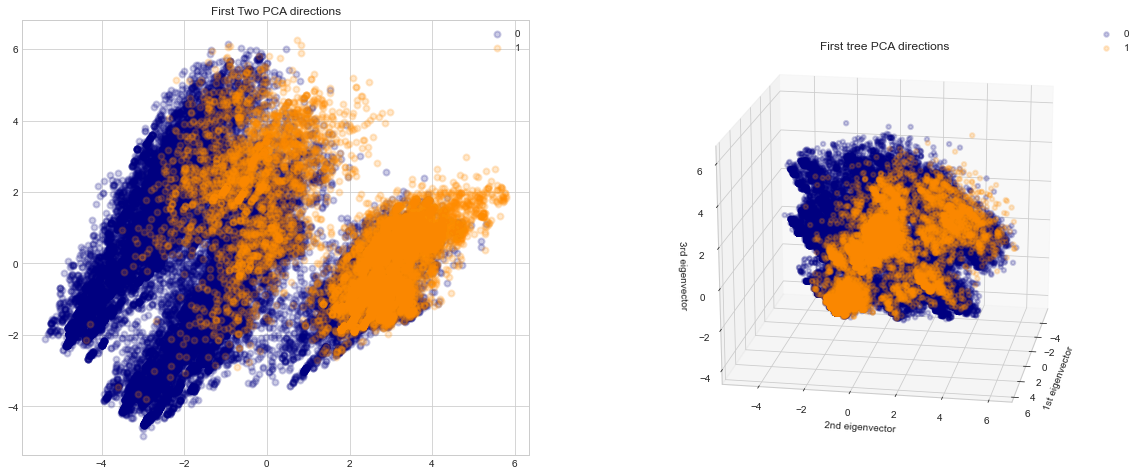

In [107]:
# 绘制二维图
plt.figure(2, figsize=(20, 8))

plt.subplot(121)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_name):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color,
                alpha=alpha, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First Two PCA directions')

# 绘制三维图
ax = plt.subplot(1, 2, 2, projection='3d')
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y ==
                                                                     i, 2], color=color, alpha=alpha, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('First tree PCA directions')
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector')
ax.set_zlabel('3rd eigenvector')

# 旋转角度
ax.view_init(20, 10)

#### 递归特征消除评估特征重要性

* 递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型）然后选出最好的（或者最差的）的特征（可以根据系数来选），把选出来的特征放到一遍，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。

In [81]:
# 计算连续弄数据集的RFE递归特征消除
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(dataset_con_enc.drop(
    'predclass', axis=1).values, dataset_con_enc['predclass'].values)
print('Feanture ranking for continuous dataset: {}'.format(selector1.ranking_))
print('Optimal number of features: {}'.format(selector1.n_features_))

Feanture ranking for continuous dataset: [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
Optimal number of features: 15


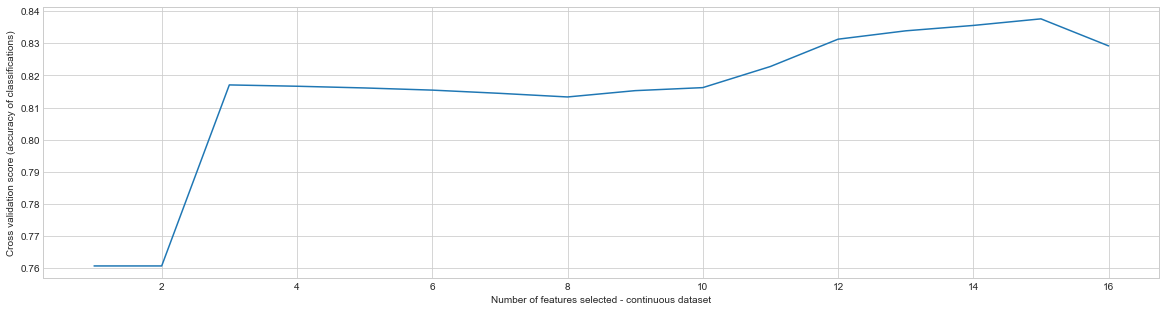

In [83]:
# 绘制不同数量特征交叉验证分数
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
plt.xlabel('Number of features selected - continuous dataset')
plt.ylabel('Cross validation score (accuracy of classifications)')
plt.plot(range(1, len(selector1.grid_scores_)+1), selector1.grid_scores_)

In [108]:
print(selector1.grid_scores_)
print(selector1.support_)

[0.76071824 0.76071824 0.81704277 0.81663332 0.81610096 0.81542537
 0.81442214 0.81329601 0.81526151 0.81620336 0.82277545 0.83127231
 0.83387248 0.83555137 0.83759883 0.82918397]
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True]


In [121]:
dataset_con_enc = dataset_con_enc[dataset_con_enc.columns[np.insert(
    selector1.support_, 0, True)]]
dataset_con_enc.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,education-num,hours-per-week,capital-gain,capital-loss,race,sex,relationship,age-hours,sex-marital
0,0,22,1,1,1,1,1,12,39,27,0,4,1,1,695,6
1,0,33,2,2,1,1,0,12,12,0,0,4,1,0,334,5
2,0,21,3,3,1,4,3,8,39,0,0,4,1,1,683,8
3,0,36,3,3,1,3,0,6,39,0,0,2,1,0,890,5
4,0,11,3,4,2,1,0,12,39,0,0,2,0,5,530,0


In [109]:
# 计算连续弄数据集的RFE递归特征消除
selector2 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector2 = selector2.fit(dataset_bin_enc.drop(
    'predclass', axis=1).values, dataset_bin_enc['predclass'].values)
print('Feanture ranking for discretised dataset: {}'.format(selector2.ranking_))
print('Optimal number of features: {}'.format(selector2.n_features_))

Feanture ranking for continuous dataset: [ 1  1  1  1  1  1  1 11 21  1  1  8  1  1 14  2  1  1  1  1  1  9  1  1
  1 15  1  1  1  1  1  1  1  1  1  1  1  1  1  1 13  1 19  1  4  1  1  1
 16 17  1  1  1  1 12  1  1  1  1  1  1  1  1  1  5  1  1  1  6  1  7  1
  1  1 23  1  1  1  1  1  3  1  1 18  1  1  1  1  1  1  1  1  1  1  1 22
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 20 10  1]
Optimal number of features: 92


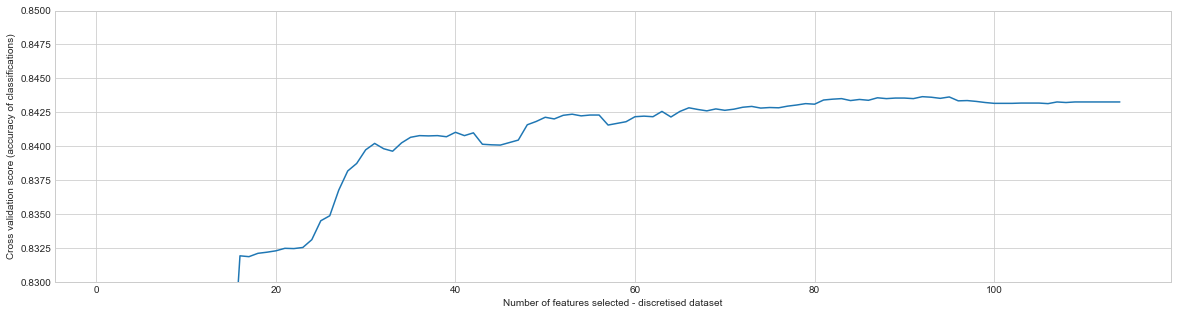

In [115]:
# 绘制不同数量特征交叉验证分数
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
plt.ylim([0.83, 0.85])
plt.xlabel('Number of features selected - discretised dataset')
plt.ylabel('Cross validation score (accuracy of classifications)')
plt.plot(range(1, len(selector2.grid_scores_)+1), selector2.grid_scores_)

In [118]:
print(selector2.grid_scores_)
print(selector2.support_)

[0.7676795  0.76812991 0.76823228 0.76823228 0.77066879 0.77568518
 0.78018944 0.78606544 0.78805134 0.79744905 0.79978297 0.81239533
 0.81272293 0.81692031 0.8216291  0.83194801 0.83188657 0.83213227
 0.83221417 0.83231654 0.8325008  0.83248035 0.83256224 0.83313547
 0.83452777 0.83489631 0.83677986 0.83819259 0.8387454  0.83974865
 0.84021958 0.83983056 0.83964629 0.84026054 0.84067004 0.84079288
 0.84077241 0.84079288 0.84071098 0.84103858 0.84079287 0.84099762
 0.84015815 0.8401172  0.84009673 0.84028095 0.84046522 0.84159128
 0.84183697 0.8421441  0.84202126 0.84228743 0.84236933 0.84224649
 0.84230791 0.84230791 0.84157084 0.84169368 0.84181653 0.84218508
 0.84222603 0.84218508 0.8425741  0.84216461 0.8425741  0.84284028
 0.84271743 0.84261504 0.84275836 0.84265599 0.8427379  0.84288122
 0.84294264 0.84281979 0.84286074 0.84284026 0.8429631  0.843045
 0.84314737 0.84310643 0.84341354 0.84347497 0.84351592 0.84337259
 0.84345449 0.84339307 0.84357735 0.84351593 0.84355688 0.843556

In [122]:
dataset_bin_enc = dataset_bin_enc[dataset_bin_enc.columns[np.insert(
    selector2.support_, 0, True)]]
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(82.7, 90.0]",workclass_Fed-gov,...,"age-hours_(7132.2, 8021.1]","age-hours_(8021.1, 8910.0]",sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleWidowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
dataset_con_enc.to_csv('data_set/adult_con_enc.csv', index=None)
dataset_bin_enc.to_csv('data_set/adult_bin_enc.csv', index=None)

#### 小结：经过RFE之后，连续型数据集选择其中15个特征来保存，只淘汰1个特征；离散型数据集中选择其中92个特征来保存，淘汰了22个特征

## （八）
## 测试不同机器学习算法效果，并统一衡量标准（使用ROC评估并计算AUC值）
## 使用连续型特征数据集
[回到顶部](#Index)

分别尝试下不同机器学习算法的效果

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

在sklearn中有很多通用函数，可以自定义一套方案

In [240]:
selected_dataset = pd.read_csv('data_set/adult_con_enc.csv')
selected_dataset.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,education-num,hours-per-week,capital-gain,capital-loss,race,sex,relationship,age-hours,sex-marital
0,0,22,1,1,1,1,1,12,39,27,0,4,1,1,695,6
1,0,33,2,2,1,1,0,12,12,0,0,4,1,0,334,5
2,0,21,3,3,1,4,3,8,39,0,0,4,1,1,683,8
3,0,36,3,3,1,3,0,6,39,0,0,2,1,0,890,5
4,0,11,3,4,2,1,0,12,39,0,0,2,0,5,530,0


In [241]:
selected_dataset.isnull().sum()

predclass         0
age               0
workclass         0
occupation        0
native-country    0
education         0
marital-status    0
education-num     0
hours-per-week    0
capital-gain      0
capital-loss      0
race              0
sex               0
relationship      0
age-hours         0
sex-marital       0
dtype: int64

In [242]:
# 划分数据集
train = selected_dataset.loc[:32560, :]
test = selected_dataset.loc[32560:, :]

X_train_w_label = train
X_train = train.drop('predclass', axis=1)
y_train = train['predclass'].astype('int')
X_test = test.drop('predclass', axis=1)
y_test = test['predclass'].astype('int')

In [243]:
print(X_train.shape, X_test.shape)

(32561, 15) (16282, 15)


In [244]:
X_train.head()

,age,workclass,occupation,native-country,education,marital-status,education-num,hours-per-week,capital-gain,capital-loss,race,sex,relationship,age-hours,sex-marital
0,22,1,1,1,1,1,12,39,27,0,4,1,1,695,6
1,33,2,2,1,1,0,12,12,0,0,4,1,0,334,5
2,21,3,3,1,4,3,8,39,0,0,4,1,1,683,8
3,36,3,3,1,3,0,6,39,0,0,2,1,0,890,5
4,11,3,4,2,1,0,12,39,0,0,2,0,5,530,0


In [245]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: predclass, dtype: int32

In [246]:
import random
# 设定随机种子
random.seed(1)

## ROC 与 AUC

<img src="images\2.png" alt="FAO" width="690" >

<img src="images\1.png" alt="FAO" width="690" >

接下来我们考虑ROC曲线图中的四个点和一条线。第一个点，(0,1)，即FPR=0, TPR=1，这意味着FN（false negative）=0，并且FP（false positive）=0。Wow，这是一个完美的分类器，它将所有的样本都正确分类。第二个点，(1,0)，即FPR=1，TPR=0，类似地分析可以发现这是一个最糟糕的分类器，因为它成功避开了所有的正确答案。第三个点，(0,0)，即FPR=TPR=0，即FP（false positive）=TP（true positive）=0，可以发现该分类器预测所有的样本都为负样本（negative）。类似的，第四个点（1,1），分类器实际上预测所有的样本都为正样本。经过以上的分析，我们可以断言，ROC曲线越接近左上角，该分类器的性能越好。

下面考虑ROC曲线图中的虚线y=x上的点。这条对角线上的点其实表示的是一个采用随机猜测策略的分类器的结果，例如(0.5,0.5)，表示该分类器随机对于一半的样本猜测其为正样本，另外一半的样本为负样本。

AUC（Area Under Curve）被定义为ROC曲线下的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

In [143]:
# 计算不同阈值下fpr
def plot_roc_curve(y_test, preds):
    fpr, tpr, treshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Charateristic')
    plt.plot(fpr, tpr, 'b', label='AUC={:.2f}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('True Posive Rate')
    plt.ylabel('False Posive Rate')
    plt.show()

In [204]:
# 返回算法结果
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # 单步计算
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression,
                          KNeighborsClassifier,
                          GaussianNB,
                          DecisionTreeClassifier,
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = 'Not Available'
    acc = round(model.score(X_test, y_test)*100, 2)
    # CV
    train_pred = model_selection.cross_val_predict(
        algo, X_train, y_train, cv=cv, n_jobs=-1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [146]:
# 逻辑回归CV寻找超参数
import time


# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {}'.format(i))
            print('Mean validation score: {0:.4f} (std: {1:.4f})'.format(
                results['mean_test_score'][candidate], results['std_test_score'][candidate]))
            print('Parameters: {}'.format(results['params'][candidate]))
            print('')


# 定义参数范围
param_dist = {'penalty': ['l1', 'l2'],
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-20, 20, 10000),
              'intercept_scaling': np.logspace(-20, 20)}

# 运行随机搜索
n_iter_search = 20
lrc = LogisticRegression()
random_search = RandomizedSearchCV(
    lrc, n_jobs=-1, param_distributions=param_dist, n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print('RandomizedSearchCV took {0:.2f} seconds for {1} candidates parameter settings.'.format(
    (time.time()-start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 55.80 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8359 (std: 0.0024)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2442053094.5486546, 'class_weight': None, 'C': 0.0128768898612489}

Model with rank: 2
Mean validation score: 0.8284 (std: 0.0034)
Parameters: {'penalty': 'l2', 'intercept_scaling': 6.551285568595496e-20, 'class_weight': None, 'C': 39697200.05904765}

Model with rank: 3
Mean validation score: 0.8283 (std: 0.0034)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4.0949150623804193e-10, 'class_weight': None, 'C': 12921446421017.209}

Model with rank: 4
Mean validation score: 0.8282 (std: 0.0033)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.8420699693267164e-17, 'class_weight': None, 'C': 3364749174.657084}

Model with rank: 5
Mean validation score: 0.8196 (std: 0.0026)
Parameters: {'penalty': 'l1', 'intercept_scaling': 719.6856730011528, 'class_weight': None, 'C': 0.0005830107566701385}



In [247]:
# 逻辑回归算法

import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(
    LogisticRegression(n_jobs=-1), X_train, y_train, X_test, 10)
log_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_log))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_log))
print('Running Time {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 83.82
Accuracy CV 10-Fold: 83.77
Running Time 0:00:10.436088


In [248]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_log))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90     24720
          1       0.72      0.53      0.61      7841

avg / total       0.83      0.84      0.83     32561



In [249]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_log))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90     12435
          1       0.72      0.52      0.60      3847

avg / total       0.83      0.84      0.83     16282



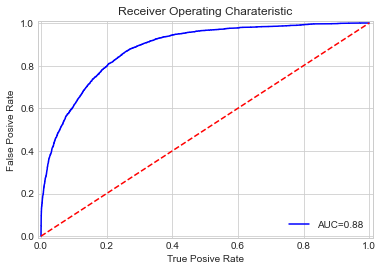

In [250]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_log)

In [171]:
# K邻近算法

start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1), X_train, y_train, X_test, 10)
knn_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_knn))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_knn))
print('Running Time {}'.format(datetime.timedelta(seconds=knn_time)))

Accuracy: 81.26
Accuracy CV 10-Fold: 81.37
Running Time 0:00:07.960707


In [172]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_knn))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88     24720
          1       0.62      0.58      0.60      7841

avg / total       0.81      0.81      0.81     32561



In [173]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_knn))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88     12435
          1       0.61      0.58      0.59      3847

avg / total       0.81      0.81      0.81     16282



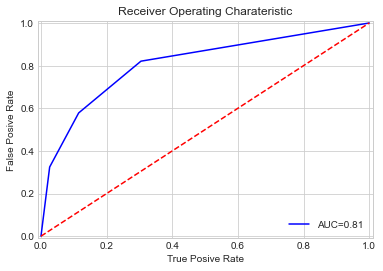

In [174]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_knn)

In [167]:
# 高斯朴素贝叶斯算法

start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gaussian = fit_ml_algo(
    GaussianNB(), X_train, y_train, X_test, 10)
gaussian_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gaussian))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gaussian))
print('Running Time {}'.format(datetime.timedelta(seconds=gaussian_time)))

Accuracy: 81.59
Accuracy CV 10-Fold: 82.03
Running Time 0:00:06.992298


In [168]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_gaussian))

             precision    recall  f1-score   support

          0       0.87      0.90      0.88     24720
          1       0.64      0.58      0.61      7841

avg / total       0.82      0.82      0.82     32561



In [169]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_gaussian))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88     12435
          1       0.62      0.57      0.59      3847

avg / total       0.81      0.82      0.81     16282



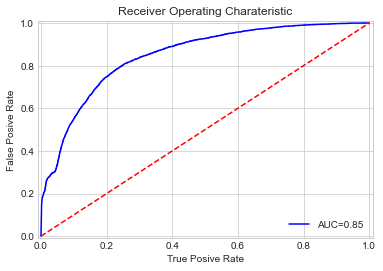

In [170]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_gaussian)

In [176]:
# 线性SVC算法

start_time = time.time()
train_pred_svc, test_pred_svc, acc_svc, acc_cv_svc, probs_svc = fit_ml_algo(
    LinearSVC(), X_train, y_train, X_test, 10)
svc_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_svc))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_svc))
print('Running Time {}'.format(datetime.timedelta(seconds=svc_time)))

Accuracy: 78.59
Accuracy CV 10-Fold: 78.41
Running Time 0:00:27.337880


In [177]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_svc))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87     24720
          1       0.60      0.32      0.41      7841

avg / total       0.76      0.78      0.76     32561



In [178]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_svc))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88     12435
          1       0.99      0.10      0.17      3847

avg / total       0.83      0.79      0.71     16282



In [180]:
# 决策树算法

start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(
    DecisionTreeClassifier(), X_train, y_train, X_test, 10)
dt_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_dt))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_dt))
print('Running Time {}'.format(datetime.timedelta(seconds=dt_time)))

Accuracy: 82.13
Accuracy CV 10-Fold: 82.0
Running Time 0:00:07.163839


In [181]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_dt))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88     24720
          1       0.63      0.60      0.62      7841

avg / total       0.82      0.82      0.82     32561



In [182]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_dt))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88     12435
          1       0.63      0.60      0.61      3847

avg / total       0.82      0.82      0.82     16282



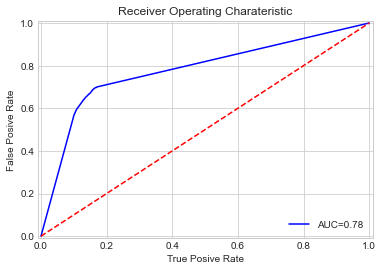

In [183]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_dt)

In [184]:
# 随机森林CV寻找超参数

# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行随机搜索
n_iter_search = 20
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,
                                   n_jobs=-1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 12.16 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8609 (std: 0.0028)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 16}

Model with rank: 2
Mean validation score: 0.8603 (std: 0.0032)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 14}

Model with rank: 3
Mean validation score: 0.8595 (std: 0.0029)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}

Model with rank: 4
Mean validation score: 0.8594 (std: 0.0026)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 19}

Model with rank: 5
Mean validation score: 0.8593 (std: 0.0011)
Parameters: {'bootstrap': True, 'criterion': 'gini',

In [187]:
# 随机森林算法

start_time = time.time()
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(RandomForestClassifier(
    n_estimators=10, min_samples_leaf=1, min_samples_split=16, criterion='gini', max_features=6, bootstrap=False, max_depth=10, n_jobs=-1), X_train, y_train, X_test, 10)
rf_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_rf))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_rf))
print('Running Time {}'.format(datetime.timedelta(seconds=rf_time)))

Accuracy: 85.95
Accuracy CV 10-Fold: 86.03
Running Time 0:00:08.723243


In [188]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     24720
          1       0.77      0.60      0.67      7841

avg / total       0.85      0.86      0.85     32561



In [189]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     12435
          1       0.76      0.60      0.67      3847

avg / total       0.85      0.86      0.85     16282



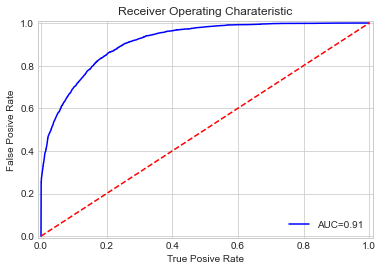

In [190]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_rf)

In [209]:
# 梯度提升算法

start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(
    GradientBoostingClassifier(), X_train, y_train, X_test, 10)
gbt_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gbt))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gbt))
print('Running Time {}'.format(datetime.timedelta(seconds=gbt_time)))

Accuracy: 86.57
Accuracy CV 10-Fold: 86.43
Running Time 0:00:13.012200


In [210]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_gbt))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     24720
          1       0.78      0.60      0.68      7841

avg / total       0.86      0.86      0.86     32561



In [211]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_gbt))

             precision    recall  f1-score   support

          0       0.88      0.95      0.92     12435
          1       0.78      0.60      0.68      3847

avg / total       0.86      0.87      0.86     16282



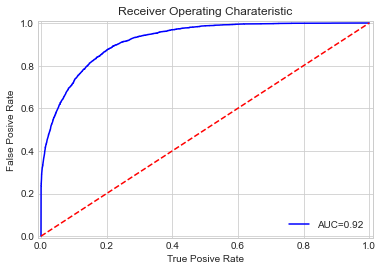

In [212]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_gbt)

In [205]:
# SGD算法

start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, probs_sgd = fit_ml_algo(
    SGDClassifier(n_jobs=-1), X_train, y_train, X_test, 10)
sgd_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_sgd))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_sgd))
print('Running Time {}'.format(datetime.timedelta(seconds=sgd_time)))

Accuracy: 81.28
Accuracy CV 10-Fold: 79.31
Running Time 0:00:08.345676


In [206]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_sgd))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88     24720
          1       0.68      0.27      0.38      7841

avg / total       0.77      0.79      0.76     32561



In [207]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_sgd))

             precision    recall  f1-score   support

          0       0.84      0.94      0.88     12435
          1       0.67      0.40      0.50      3847

avg / total       0.80      0.81      0.79     16282



### 比较不同算法结果

In [214]:
# 测试集准确度评分
models_acc = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Beyes',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [acc_knn, acc_log,
              acc_rf, acc_gaussian,
              acc_sgd, acc_svc,
              acc_dt, acc_gbt]
})
models_acc.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.57
2,Random Forest,85.95
1,Logistic Regression,83.82
6,Decision Tree,82.13
3,Naive Beyes,81.59
4,Stochastic Gradient Decent,81.28
0,KNN,81.26
5,Linear SVC,78.59


In [215]:
# 训练集准确度评分
models_acc_cv = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Beyes',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [acc_cv_knn, acc_cv_log,
              acc_cv_rf, acc_cv_gaussian,
              acc_cv_sgd, acc_cv_svc,
              acc_cv_dt, acc_cv_gbt]
})
models_acc_cv.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.43
2,Random Forest,86.03
1,Logistic Regression,83.77
3,Naive Beyes,82.03
6,Decision Tree,82.00
0,KNN,81.37
4,Stochastic Gradient Decent,79.31
5,Linear SVC,78.41


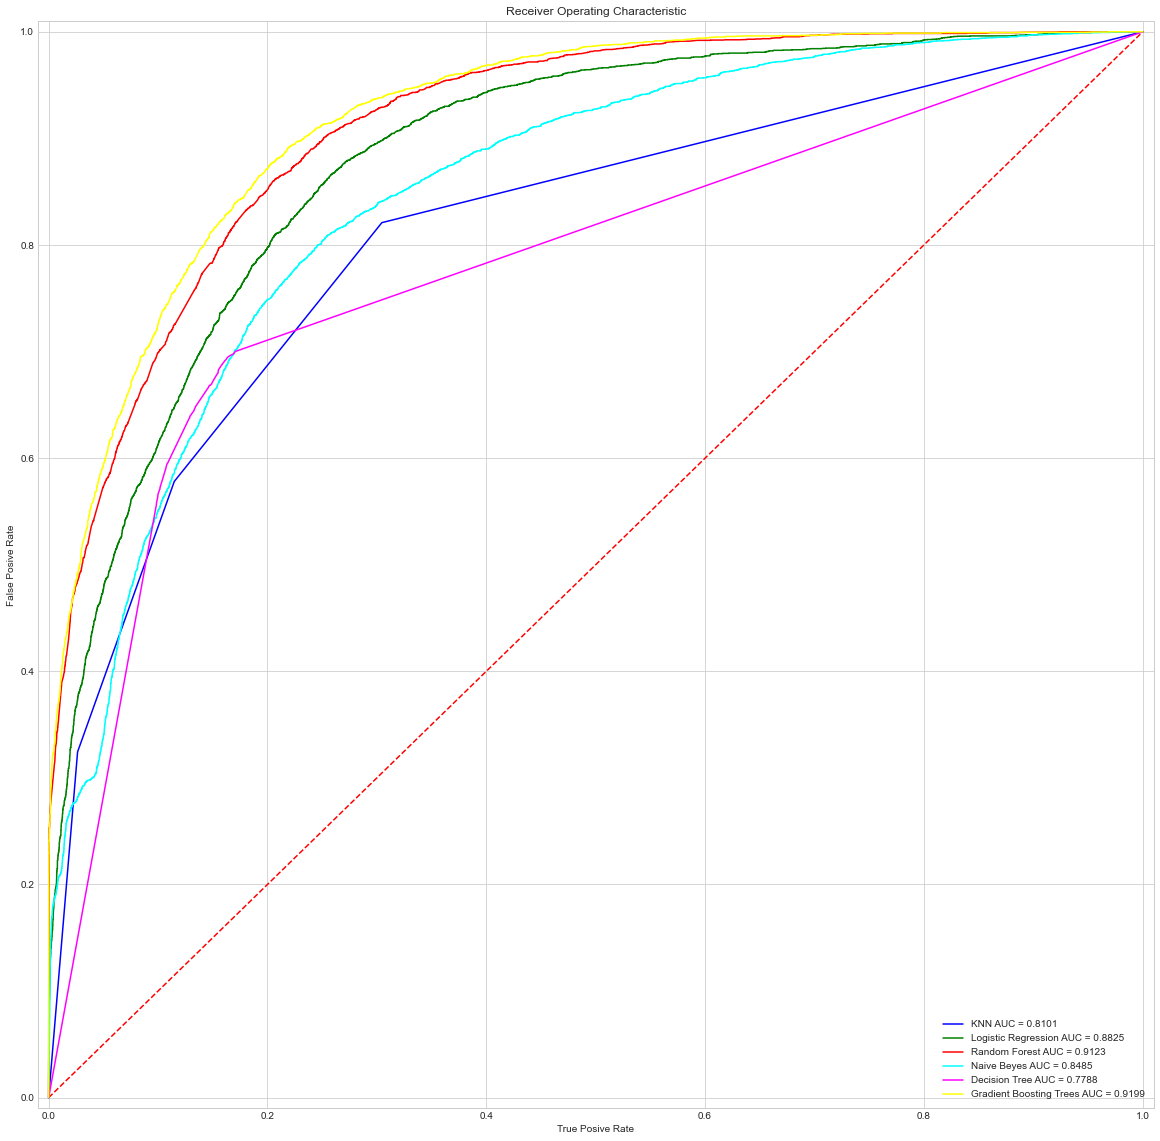

In [218]:
# 绘制不同模型ROC评分
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 20))

models = ['KNN', 'Logistic Regression',
          'Random Forest', 'Naive Beyes',
          'Decision Tree', 'Gradient Boosting Trees']
probs = [probs_knn, probs_log,
         probs_rf, probs_gaussian,
         probs_dt, probs_gbt]
colors = ['blue', 'green',
          'red', 'cyan',
          'magenta', 'yellow']

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('True Posive Rate')
plt.ylabel('False Posive Rate')


def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='{0} AUC = {1:.4f}'.format(
        model, roc_auc), color=colors[i])
    plt.legend(loc='lower right')


for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
plt.show()

#### 小结：如上图所示，在经过特征编码和特征选择后的连续型数据集里，以AUC面积值来衡量，梯度提升算法最优，其次为随机森林算法

## （九）
## 测试不同机器学习算法效果，并统一衡量标准（使用ROC评估并计算AUC值）
## 使用离散型特征数据集
[回到顶部](#Index)

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

In [251]:
selected_dataset = pd.read_csv('data_set/adult_bin_enc.csv')
selected_dataset.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(82.7, 90.0]",workclass_Fed-gov,...,"age-hours_(7132.2, 8021.1]","age-hours_(8021.1, 8910.0]",sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleWidowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [252]:
selected_dataset.isnull().sum()

predclass                        0
age_(16.927, 24.3]               0
age_(24.3, 31.6]                 0
age_(31.6, 38.9]                 0
age_(38.9, 46.2]                 0
                                ..
sex-marital_FemaleSeparated      0
sex-marital_FemaleWidowed        0
sex-marital_MaleMarried          0
sex-marital_MaleNever-Married    0
sex-marital_MaleWidowed          0
Length: 93, dtype: int64

In [253]:
# 划分数据集
train = selected_dataset.loc[:32560, :]
test = selected_dataset.loc[32560:, :]

X_train_w_label = train
X_train = train.drop('predclass', axis=1)
y_train = train['predclass'].astype('int')
X_test = test.drop('predclass', axis=1)
y_test = test['predclass'].astype('int')

In [254]:
print(X_train.shape, X_test.shape)

(32561, 92) (16282, 92)


In [255]:
X_train.head()

,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(82.7, 90.0]",workclass_Fed-gov,workclass_Not Working,...,"age-hours_(7132.2, 8021.1]","age-hours_(8021.1, 8910.0]",sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleWidowed
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [256]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: predclass, dtype: int32

In [257]:
import random
# 设定随机种子
random.seed(1)

In [227]:
# 逻辑回归CV寻找超参数
import time


# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {}'.format(i))
            print('Mean validation score: {0:.4f} (std: {1:.4f})'.format(
                results['mean_test_score'][candidate], results['std_test_score'][candidate]))
            print('Parameters: {}'.format(results['params'][candidate]))
            print('')


# 定义参数范围
param_dist = {'penalty': ['l1', 'l2'],
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-20, 20, 10000),
              'intercept_scaling': np.logspace(-20, 20)}

# 运行随机搜索
n_iter_search = 20
lrc = LogisticRegression()
random_search = RandomizedSearchCV(
    lrc, n_jobs=-1, param_distributions=param_dist, n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print('RandomizedSearchCV took {0:.2f} seconds for {1} candidates parameter settings.'.format(
    (time.time()-start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 208.31 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8434 (std: 0.0038)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1e-20, 'class_weight': None, 'C': 202829309919.96997}

Model with rank: 2
Mean validation score: 0.8433 (std: 0.0035)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1325711.365590111, 'class_weight': None, 'C': 830791317629062.2}

Model with rank: 3
Mean validation score: 0.8433 (std: 0.0039)
Parameters: {'penalty': 'l1', 'intercept_scaling': 56898660.290182814, 'class_weight': None, 'C': 94296.90741602505}

Model with rank: 4
Mean validation score: 0.8432 (std: 0.0040)
Parameters: {'penalty': 'l1', 'intercept_scaling': 202358.96477251637, 'class_weight': None, 'C': 617844361.9080874}

Model with rank: 5
Mean validation score: 0.7986 (std: 0.0026)
Parameters: {'penalty': 'l1', 'intercept_scaling': 7.543120063354607e-07, 'class_weight': 'balanced', 'C': 12339828699919.193}

Model with rank: 5
Me

In [258]:
# 逻辑回归算法

import datetime
start_time = time.time()
train_pred_log2, test_pred_log2, acc_log2, acc_cv_log2, probs_log2 = fit_ml_algo(
    LogisticRegression(n_jobs=-1), X_train, y_train, X_test, 10)
log2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_log2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_log2))
print('Running Time {}'.format(datetime.timedelta(seconds=log2_time)))

Accuracy: 84.44
Accuracy CV 10-Fold: 84.33
Running Time 0:00:09.529510


In [259]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_log2))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90     24720
          1       0.72      0.58      0.64      7841

avg / total       0.84      0.84      0.84     32561



In [260]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_log2))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.71      0.58      0.64      3847

avg / total       0.84      0.84      0.84     16282



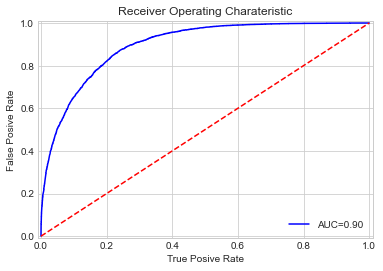

In [261]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_log2)

In [262]:
# K邻近算法

start_time = time.time()
train_pred_knn2, test_pred_knn2, acc_knn2, acc_cv_knn2, probs_knn2 = fit_ml_algo(
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1), X_train, y_train, X_test, 10)
knn2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_knn2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_knn2))
print('Running Time {}'.format(datetime.timedelta(seconds=knn2_time)))

Accuracy: 81.23
Accuracy CV 10-Fold: 81.5
Running Time 0:01:19.581229


In [263]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_knn2))

             precision    recall  f1-score   support

          0       0.87      0.90      0.88     24720
          1       0.63      0.56      0.59      7841

avg / total       0.81      0.81      0.81     32561



In [264]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_knn2))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88     12435
          1       0.61      0.57      0.59      3847

avg / total       0.81      0.81      0.81     16282



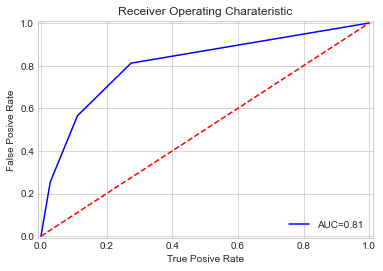

In [265]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_knn2)

In [266]:
# 高斯朴素贝叶斯算法

start_time = time.time()
train_pred_gaussian2, test_pred_gaussian2, acc_gaussian2, acc_cv_gaussian2, probs_gaussian2 = fit_ml_algo(
    GaussianNB(), X_train, y_train, X_test, 10)
gaussian2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gaussian2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gaussian2))
print('Running Time {}'.format(datetime.timedelta(seconds=gaussian2_time)))

Accuracy: 74.31
Accuracy CV 10-Fold: 74.21
Running Time 0:00:08.107315


In [267]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_gaussian2))

             precision    recall  f1-score   support

          0       0.95      0.70      0.80     24720
          1       0.48      0.88      0.62      7841

avg / total       0.84      0.74      0.76     32561



In [268]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_gaussian2))

             precision    recall  f1-score   support

          0       0.95      0.70      0.81     12435
          1       0.48      0.87      0.62      3847

avg / total       0.84      0.74      0.76     16282



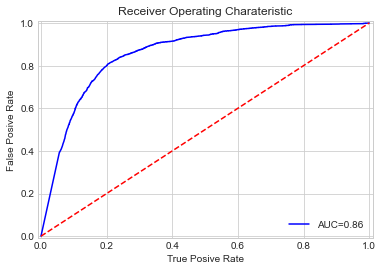

In [269]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_gaussian2)

In [270]:
# 线性SVC算法

start_time = time.time()
train_pred_svc2, test_pred_svc2, acc_svc2, acc_cv_svc2, probs_svc2 = fit_ml_algo(
    LinearSVC(), X_train, y_train, X_test, 10)
svc2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_svc2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_svc2))
print('Running Time {}'.format(datetime.timedelta(seconds=svc2_time)))

Accuracy: 84.43
Accuracy CV 10-Fold: 84.44
Running Time 0:00:13.233604


In [271]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_svc2))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90     24720
          1       0.72      0.58      0.64      7841

avg / total       0.84      0.84      0.84     32561



In [272]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_svc2))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.71      0.58      0.64      3847

avg / total       0.84      0.84      0.84     16282



In [273]:
# 决策树算法

start_time = time.time()
train_pred_dt2, test_pred_dt2, acc_dt2, acc_cv_dt2, probs_dt2 = fit_ml_algo(
    DecisionTreeClassifier(), X_train, y_train, X_test, 10)
dt2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_dt2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_dt2))
print('Running Time {}'.format(datetime.timedelta(seconds=dt2_time)))

Accuracy: 80.44
Accuracy CV 10-Fold: 80.39
Running Time 0:00:08.738633


In [274]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_dt2))

             precision    recall  f1-score   support

          0       0.86      0.89      0.87     24720
          1       0.61      0.53      0.57      7841

avg / total       0.80      0.80      0.80     32561



In [275]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_dt2))

             precision    recall  f1-score   support

          0       0.86      0.89      0.87     12435
          1       0.60      0.54      0.56      3847

avg / total       0.80      0.80      0.80     16282



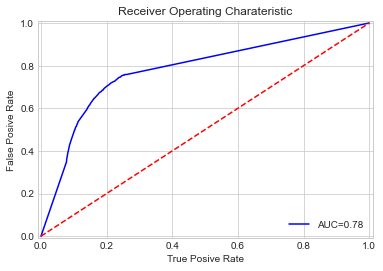

In [276]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_dt2)

In [288]:
# 随机森林CV寻找超参数

# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(36, 66),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# 运行随机搜索
n_iter_search = 60
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,
                                   n_jobs=-1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 62.99 seconds for 60 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8385 (std: 0.0065)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 36, 'min_samples_leaf': 8, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.8383 (std: 0.0030)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 46, 'min_samples_leaf': 1, 'min_samples_split': 17}

Model with rank: 3
Mean validation score: 0.8381 (std: 0.0035)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 42, 'min_samples_leaf': 7, 'min_samples_split': 6}

Model with rank: 4
Mean validation score: 0.8381 (std: 0.0046)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 61, 'min_samples_leaf': 7, 'min_samples_split': 8}

Model with rank: 5
Mean validation score: 0.8378 (std: 0.0055)
Parameters: {'bootstrap': False, 'criterion

In [289]:
# 随机森林算法

start_time = time.time()
train_pred_rf2, test_pred_rf2, acc_rf2, acc_cv_rf2, probs_rf2 = fit_ml_algo(RandomForestClassifier(
    n_estimators=10, min_samples_leaf=8, min_samples_split=6, criterion='entropy', max_features=36, bootstrap=False, max_depth=None, n_jobs=-1), X_train, y_train, X_test, 10)
rf2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_rf2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_rf2))
print('Running Time {}'.format(datetime.timedelta(seconds=rf2_time)))

Accuracy: 83.64
Accuracy CV 10-Fold: 83.91
Running Time 0:00:11.426831


In [290]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_rf2))

             precision    recall  f1-score   support

          0       0.87      0.92      0.90     24720
          1       0.70      0.58      0.64      7841

avg / total       0.83      0.84      0.83     32561



In [291]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_rf2))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     12435
          1       0.68      0.58      0.63      3847

avg / total       0.83      0.84      0.83     16282



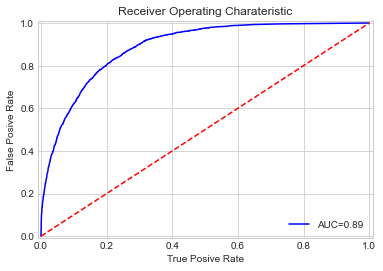

In [292]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_rf2)

In [293]:
# 梯度提升算法

start_time = time.time()
train_pred_gbt2, test_pred_gbt2, acc_gbt2, acc_cv_gbt2, probs_gbt2 = fit_ml_algo(
    GradientBoostingClassifier(), X_train, y_train, X_test, 10)
gbt2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gbt2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gbt2))
print('Running Time {}'.format(datetime.timedelta(seconds=gbt2_time)))

Accuracy: 84.42
Accuracy CV 10-Fold: 84.25
Running Time 0:00:46.811089


In [294]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_gbt2))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90     24720
          1       0.72      0.57      0.63      7841

avg / total       0.83      0.84      0.84     32561



In [295]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_gbt2))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     12435
          1       0.71      0.58      0.64      3847

avg / total       0.84      0.84      0.84     16282



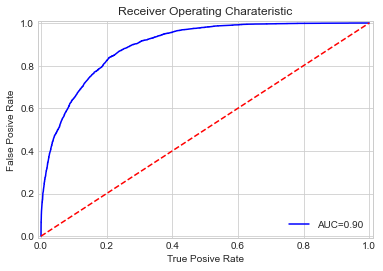

In [296]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_gbt2)

In [297]:
# SGD算法

start_time = time.time()
train_pred_sgd2, test_pred_sgd2, acc_sgd2, acc_cv_sgd2, probs_sgd2 = fit_ml_algo(
    SGDClassifier(n_jobs=-1), X_train, y_train, X_test, 10)
sgd2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_sgd2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_sgd2))
print('Running Time {}'.format(datetime.timedelta(seconds=sgd2_time)))

Accuracy: 82.24
Accuracy CV 10-Fold: 81.47
Running Time 0:00:09.164504


In [298]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_sgd2))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88     24720
          1       0.61      0.62      0.62      7841

avg / total       0.82      0.81      0.82     32561



In [299]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_sgd2))

             precision    recall  f1-score   support

          0       0.82      0.98      0.89     12435
          1       0.81      0.33      0.46      3847

avg / total       0.82      0.82      0.79     16282



### 比较不同算法结果

In [300]:
# 测试集准确度评分，对比连续型数据集和离散型数据集
models_acc2 = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Beyes',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score_con': [acc_knn, acc_log,
                  acc_rf, acc_gaussian,
                  acc_sgd, acc_svc,
                  acc_dt, acc_gbt],
    'Score_bin': [acc_knn2, acc_log2,
                  acc_rf2, acc_gaussian2,
                  acc_sgd2, acc_svc2,
                  acc_dt2, acc_gbt2],
})
models_acc2.sort_values(by='Score_bin', ascending=False)

,Model,Score_con,Score_bin
1,Logistic Regression,83.82,84.44
5,Linear SVC,78.59,84.43
7,Gradient Boosting Trees,86.57,84.42
2,Random Forest,85.95,83.64
4,Stochastic Gradient Decent,81.28,82.24
0,KNN,81.26,81.23
6,Decision Tree,82.13,80.44
3,Naive Beyes,81.59,74.31


In [302]:
# 训练集准确度评分，对比连续型数据集和离散型数据集
models_acc_cv2 = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Beyes',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score_con': [acc_cv_knn, acc_cv_log,
                  acc_cv_rf, acc_cv_gaussian,
                  acc_cv_sgd, acc_cv_svc,
                  acc_cv_dt, acc_cv_gbt],
    'Score_bin': [acc_cv_knn2, acc_cv_log2,
                  acc_cv_rf2, acc_cv_gaussian2,
                  acc_cv_sgd2, acc_cv_svc2,
                  acc_cv_dt2, acc_cv_gbt2]
})
models_acc_cv2.sort_values(by='Score_bin', ascending=False)

,Model,Score_con,Score_bin
5,Linear SVC,78.41,84.44
1,Logistic Regression,83.77,84.33
7,Gradient Boosting Trees,86.43,84.25
2,Random Forest,86.03,83.91
0,KNN,81.37,81.50
4,Stochastic Gradient Decent,79.31,81.47
6,Decision Tree,82.00,80.39
3,Naive Beyes,82.03,74.21


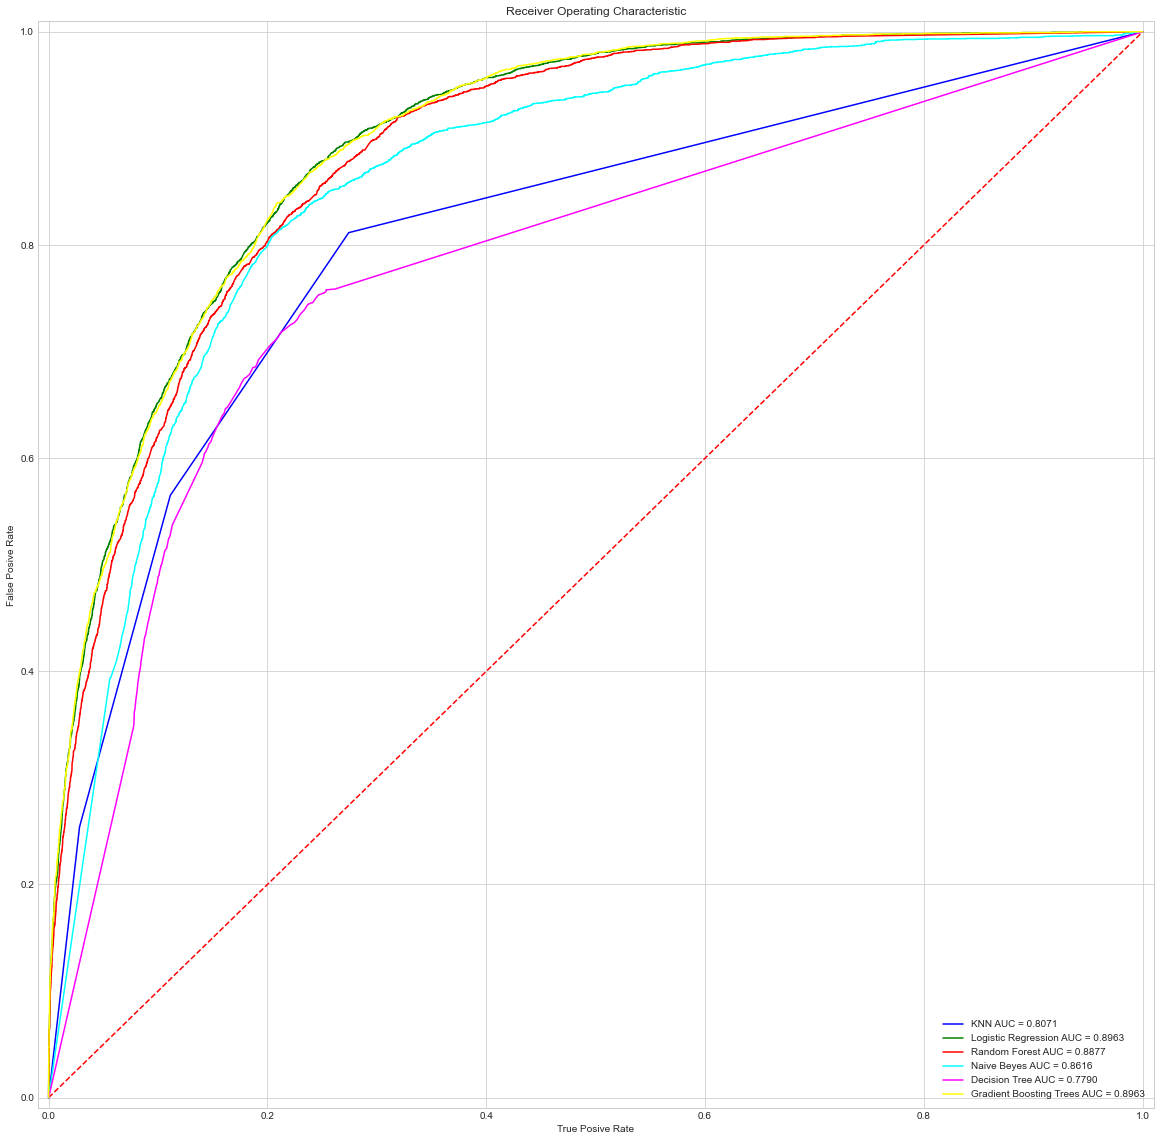

In [303]:
# 绘制不同模型ROC评分
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 20))

models = ['KNN', 'Logistic Regression',
          'Random Forest', 'Naive Beyes',
          'Decision Tree', 'Gradient Boosting Trees']
probs = [probs_knn2, probs_log2,
         probs_rf2, probs_gaussian2,
         probs_dt2, probs_gbt2]
colors = ['blue', 'green',
          'red', 'cyan',
          'magenta', 'yellow']

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('True Posive Rate')
plt.ylabel('False Posive Rate')


def plot_roc_curves_bin(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='{0} AUC = {1:.4f}'.format(
        model, roc_auc), color=colors[i])
    plt.legend(loc='lower right')


for i, model in list(enumerate(models)):
    plot_roc_curves_bin(y_test, probs[i], models[i])
plt.show()

#### 小结：如上图所示，在经过特征编码和特征选择后的离散型数据集里，以AUC面积值来衡量，逻辑回归和梯度提升算法最优，考虑到预测准确度，逻辑回归比梯度提升更好一点点。单以准确度来考虑，线性SVC会比梯度提升算法要好一点点，但因为无法计算概率问题，所以无法得出AUC面积，所以还是选择梯度提升算法进行下一步的调参

## （十）
## 使用连续型特征数据集，调节最优算法的超参数
[回到顶部](#Index)

### 调节随机森林算法最优参数
#### 先用随机CV搜索

In [415]:
df_con = pd.read_csv('data_set/adult_con_enc.csv')

In [472]:
X = df_con.drop('predclass', axis=1)
y = df_con['predclass'].astype('int')

In [473]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [364]:
from pprint import pprint
rf = RandomForestClassifier()
# 打印所有参数
pprint(rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [332]:
# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"max_depth": [10, 15, None],
              'n_estimators': [int(x) for x in np.arange(start=10, stop=201, step=10)],
              "max_features": sp_randint(6, 15),
              "min_samples_split": sp_randint(2, 21),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

# 运行随机搜索
n_iter_search = 100
rfc = RandomForestClassifier(random_state=42)
rfc_random_search = RandomizedSearchCV(
    rfc, n_jobs=-1, n_iter=n_iter_search, cv=3, verbose=3, param_distributions=param_dist, )

start = time.time()
rfc_random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(rfc_random_search.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


RandomizedSearchCV took 408.58 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8624 (std: 0.0031)
Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 6, 'min_samples_split': 12, 'n_estimators': 70}

Model with rank: 2
Mean validation score: 0.8619 (std: 0.0027)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 120}

Model with rank: 3
Mean validation score: 0.8618 (std: 0.0023)
Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 150}

Model with rank: 4
Mean validation score: 0.8616 (std: 0.0033)
Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 7, 'min_samples_split': 11, 'n_estimators': 160}

Model with rank: 5
Mean validation score: 0.8615 (std: 0.0034)
Parameters: {'bootstrap': True, 'max_depth': 15, 'max_

In [335]:
rfc_random_best_params_con = rfc_random_search.best_params_
rfc_random_best_params_con

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 12,
 'n_estimators': 70}

In [336]:
rfc_random_best_score_con = rfc_random_search.best_score_
rfc_random_best_score_con

0.8623570200103737

#### 使用网格CV搜索

In [373]:
# 定义参数
param_grid = {"max_depth": [15],
              'n_estimators': [65, 70, 75],
              "max_features": [6, 7, 8],
              "min_samples_split": [10, 12, 14, 16],
              "min_samples_leaf": [4, 5, 6, 7],
              "bootstrap": [True]}

# 网络搜索
rfc = RandomForestClassifier(random_state=42)
rfc_grid_search = GridSearchCV(
    estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
start = time.time()
rfc_grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for best parameter settings." %
      ((time.time() - start)))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  4.9min finished


GridSearchCV took 300.06 seconds for best parameter settings.


In [374]:
rfc_best_params_con = rfc_grid_search.best_params_
rfc_best_params_con

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 70}

In [376]:
import joblib

rfc_best_con = rfc_grid_search.best_estimator_
joblib.dump(rfc_best_con, "./rfc_best_con.pkl")  # 保存算法文件

['./rfc_best_con.pkl']

In [383]:
start_time = time.time()
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(
    rfc_best_con, X_train, y_train, X_test, 5)
rf_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_rf))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_rf))
print('Running Time {}'.format(datetime.timedelta(seconds=rf_time)))

Accuracy: 86.22
Accuracy CV 10-Fold: 86.16
Running Time 0:00:12.039809


In [384]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     27907
          1       0.77      0.60      0.67      8724

avg / total       0.86      0.86      0.86     36631



In [385]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_rf))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      9248
          1       0.78      0.60      0.68      2963

avg / total       0.86      0.86      0.86     12211



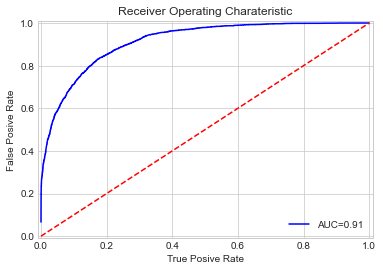

In [386]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_rf)

### 调节梯度提升算法最优参数
#### 先用随机CV搜索

In [419]:
gbt = GradientBoostingClassifier()
# 打印所有参数
pprint(gbt.get_params())

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


In [422]:
# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"max_depth": [int(x) for x in np.arange(start=3, stop=11)],
              'n_estimators': [int(x) for x in np.arange(start=50, stop=251, step=10)],
              "learning_rate": np.logspace(-2, 2, 1000),
              "min_samples_split": sp_randint(2, 21),
              "min_samples_leaf": sp_randint(1, 11),
              "max_features": [None, 'sqrt', 6, 10]}

# 运行随机搜索
n_iter_search = 100
gbt = GradientBoostingClassifier(random_state=42)
gbt_random_search = RandomizedSearchCV(
    gbt, n_jobs=-1, n_iter=n_iter_search, cv=3, verbose=4, param_distributions=param_dist, )

start = time.time()
gbt_random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(gbt_random_search.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV took 521.95 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8699 (std: 0.0027)
Parameters: {'learning_rate': 0.15176833902834053, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 18, 'n_estimators': 90}

Model with rank: 2
Mean validation score: 0.8696 (std: 0.0024)
Parameters: {'learning_rate': 0.2038493398252463, 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 19, 'n_estimators': 120}

Model with rank: 2
Mean validation score: 0.8696 (std: 0.0025)
Parameters: {'learning_rate': 0.019783188827841643, 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 210}

Model with rank: 4
Mean validation score: 0.8693 (std: 0.0032)
Parameters: {'learning_rate': 0.2340827276178293, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 17, 'n_estimators': 240}

Model with rank: 5
Mean validation sco

In [423]:
gbt_random_best_params_con = gbt_random_search.best_params_
gbt_random_best_params_con

{'learning_rate': 0.15176833902834053,
 'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 18,
 'n_estimators': 90}

In [424]:
gbt_random_best_score_con = gbt_random_search.best_score_
gbt_random_best_score_con

0.8698916218503453

#### 使用网格CV搜索

In [425]:
param_grid = {"max_depth": [4, 5, 6],
              'n_estimators': [90],
              "learning_rate": np.linspace(0.1, 0.2, 21),
              "min_samples_split": [17, 18, 19],
              "min_samples_leaf": [6],
              "max_features": [10]}

# 网络搜索
gbt = GradientBoostingClassifier(random_state=42)
gbt_grid_search = GridSearchCV(
    estimator=gbt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=6)
start = time.time()
gbt_grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for best parameter settings." %
      ((time.time() - start)))

Fitting 3 folds for each of 189 candidates, totalling 567 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed:  5.5min finished


GridSearchCV took 332.61 seconds for best parameter settings.


In [426]:
gbt_best_params_con = gbt_grid_search.best_params_
gbt_best_params_con

{'learning_rate': 0.10500000000000001,
 'max_depth': 6,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 18,
 'n_estimators': 90}

In [427]:
import joblib

gbt_best_con = gbt_grid_search.best_estimator_
joblib.dump(gbt_best_con, "./gbt_best_con.pkl")  # 保存算法文件

['./gbt_best_con.pkl']

In [428]:
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(
    gbt_best_con, X_train, y_train, X_test, 5)
gbt_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gbt))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gbt))
print('Running Time {}'.format(datetime.timedelta(seconds=gbt_time)))

Accuracy: 87.22
Accuracy CV 10-Fold: 87.05
Running Time 0:00:14.263854


In [429]:
# 打印训练集得分
print(metrics.classification_report(y_train, train_pred_gbt))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92     27907
          1       0.78      0.64      0.70      8724

avg / total       0.87      0.87      0.87     36631



In [430]:
# 打印测试集得分
print(metrics.classification_report(y_test, test_pred_gbt))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92      9248
          1       0.80      0.64      0.71      2963

avg / total       0.87      0.87      0.87     12211



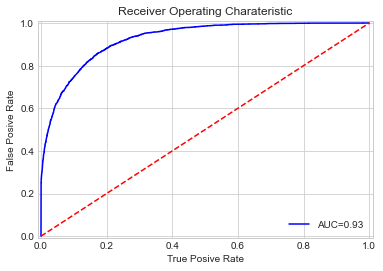

In [431]:
# 绘制ROC曲线
plot_roc_curve(y_test, probs_gbt)

#### 对比最优算法的最好模型的结果

## （十一）
## 使用离散型特征数据集，调节最优算法的超参数
[回到顶部](#Index)

### 调节逻辑回归算法最优参数
#### 先用随机CV搜索

In [432]:
df_bin = pd.read_csv('data_set/adult_bin_enc.csv')

In [469]:
X_bin = df_bin.drop('predclass', axis=1)
y_bin = df_bin['predclass'].astype('int')

In [470]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [390]:
from pprint import pprint
log = LogisticRegression()
# 打印所有参数
pprint(log.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [391]:
# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"penalty": ['l1', 'l2'],
              'fit_intercept': [True, False],
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-10, 10, 1000),
              'intercept_scaling': np.logspace(-20, 20),
              'solver': ['liblinear', 'saga']}

# 运行随机搜索
n_iter_search = 100
log = LogisticRegression(random_state=42)
log_random_search = RandomizedSearchCV(
    log, n_jobs=-1, n_iter=n_iter_search, cv=3, verbose=3, param_distributions=param_dist, )

start = time.time()
log_random_search.fit(X_train_bin, y_train_bin)
print('RandomizedSearchCV took {0:.2f} seconds for {1} candidates parameter settings.'.format(
    (time.time()-start), n_iter_search))
report(log_random_search.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV took 425.45 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8445 (std: 0.0028)
Parameters: {'solver': 'saga', 'penalty': 'l1', 'intercept_scaling': 56898660.290182814, 'fit_intercept': True, 'class_weight': None, 'C': 1.5494950393146316}

Model with rank: 2
Mean validation score: 0.8445 (std: 0.0028)
Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'intercept_scaling': 2.559547922699533, 'fit_intercept': True, 'class_weight': None, 'C': 2.3462288481422626}

Model with rank: 3
Mean validation score: 0.8444 (std: 0.0028)
Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'intercept_scaling': 104811313415.46916, 'fit_intercept': False, 'class_weight': None, 'C': 4.271993966306777}

Model with rank: 4
Mean validation score: 0.8444 (std: 0.0028)
Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'intercept_scaling': 1.1513953993264481e-07, 'fit_intercept': False, 'class_weight': None, 'C': 7.09334120498799}

Model with ra

In [392]:
log_random_best_params_bin = log_random_search.best_params_
log_random_best_params_bin

{'solver': 'saga',
 'penalty': 'l1',
 'intercept_scaling': 56898660.290182814,
 'fit_intercept': True,
 'class_weight': None,
 'C': 1.5494950393146316}

In [393]:
log_random_best_score_bin = log_random_search.best_score_
log_random_best_score_bin

0.8445305888455134

#### 使用网格CV搜索

In [408]:
# 定义参数
param_grid = {"penalty": ['l1'],
              'fit_intercept': [True],
              'class_weight': [None],
              'C': np.logspace(0, 1, 10),
              'intercept_scaling': np.logspace(7, 9, 10),
              'solver': ['saga']}

# 网络搜索
log = LogisticRegression(random_state=42)
log_grid_search = GridSearchCV(
    estimator=log, param_grid=param_grid, cv=3, n_jobs=-1, verbose=5)
start = time.time()
log_grid_search.fit(X_train_bin, y_train_bin)
print("GridSearchCV took %.2f seconds for best parameter settings." %
      ((time.time() - start)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.9min finished


GridSearchCV took 417.98 seconds for best parameter settings.


In [409]:
log_best_params_bin = log_grid_search.best_params_
log_best_params_bin

{'C': 2.154434690031884,
 'class_weight': None,
 'fit_intercept': True,
 'intercept_scaling': 10000000.0,
 'penalty': 'l1',
 'solver': 'saga'}

In [410]:
import joblib

log_best_bin = log_grid_search.best_estimator_
joblib.dump(log_best_bin, "./log_best_bin.pkl")  # 保存算法文件

['./log_best_bin.pkl']

In [411]:
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(
    LogisticRegression(n_jobs=-1), X_train_bin, y_train_bin, X_test_bin, 10)
log_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_log))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_log))
print('Running Time {}'.format(datetime.timedelta(seconds=log_time)))

Accuracy: 83.98
Accuracy CV 10-Fold: 84.37
Running Time 0:00:09.278185


In [412]:
# 打印训练集得分
print(metrics.classification_report(y_train_bin, train_pred_log))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     27907
          1       0.71      0.58      0.64      8724

avg / total       0.84      0.84      0.84     36631



In [413]:
# 打印测试集得分
print(metrics.classification_report(y_test_bin, test_pred_log))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      9248
          1       0.71      0.57      0.63      2963

avg / total       0.83      0.84      0.83     12211



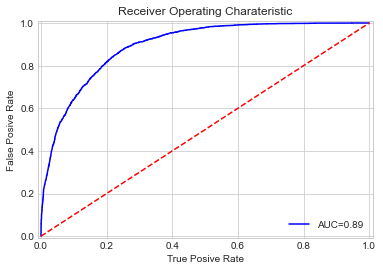

In [414]:
# 绘制ROC曲线
plot_roc_curve(y_test_bin, probs_log)

### 调节梯度提升算法最优参数
#### 先用随机CV搜索

In [435]:
# 打印最优分数的超参数
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# 定义参数范围
param_dist = {"max_depth": [int(x) for x in np.arange(start=3, stop=11)],
              'n_estimators': [int(x) for x in np.arange(start=50, stop=251, step=10)],
              "learning_rate": np.logspace(-2, 2, 1000),
              "min_samples_split": sp_randint(2, 21),
              "min_samples_leaf": sp_randint(1, 11),
              "max_features": [None, 'sqrt', 'log2', 33, 66]}

# 运行随机搜索
n_iter_search = 100
gbt2 = GradientBoostingClassifier(random_state=42)
gbt2_random_search = RandomizedSearchCV(
    gbt2, n_jobs=-1, n_iter=n_iter_search, cv=3, verbose=4, param_distributions=param_dist, )

start = time.time()
gbt2_random_search.fit(X_train_bin, y_train_bin)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(gbt2_random_search.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.4min finished


RandomizedSearchCV took 1413.08 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.8452 (std: 0.0028)
Parameters: {'learning_rate': 0.12738113231864784, 'max_depth': 3, 'max_features': 33, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 170}

Model with rank: 2
Mean validation score: 0.8450 (std: 0.0028)
Parameters: {'learning_rate': 0.2473964100886813, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 220}

Model with rank: 2
Mean validation score: 0.8450 (std: 0.0034)
Parameters: {'learning_rate': 0.0732596542821523, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 120}

Model with rank: 4
Mean validation score: 0.8447 (std: 0.0015)
Parameters: {'learning_rate': 0.04663034929742731, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 130}

Model with rank: 5
Mean validation

In [436]:
gbt_random_best_params_bin = gbt2_random_search.best_params_
gbt_random_best_params_bin

{'learning_rate': 0.12738113231864784,
 'max_depth': 3,
 'max_features': 33,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 170}

In [437]:
gbt_random_best_score_bin = gbt_random_search.best_score_
gbt_random_best_score_bin

0.8698916218503453

In [445]:
gbt_random_best_bin = gbt_random_search.best_estimator_

#### 使用网格CV搜索

In [438]:
param_grid = {"max_depth": [3],
              'n_estimators': [170],
              "learning_rate": np.linspace(0.07, 0.2, 14),
              "min_samples_split": [5],
              "min_samples_leaf": [5, 7, 9],
              "max_features": [33, 'sqrt']}

# 网络搜索
gbt2 = GradientBoostingClassifier(random_state=42)
gbt2_grid_search = GridSearchCV(
    estimator=gbt2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=6)
start = time.time()
gbt2_grid_search.fit(X_train_bin, y_train_bin)
print("GridSearchCV took %.2f seconds for best parameter settings." %
      ((time.time() - start)))

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  3.3min finished


GridSearchCV took 204.89 seconds for best parameter settings.


In [439]:
gbt_best_params_bin = gbt2_grid_search.best_params_
gbt_best_params_bin

{'learning_rate': 0.16,
 'max_depth': 3,
 'max_features': 33,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 170}

In [440]:
import joblib

gbt_best_bin = gbt2_grid_search.best_estimator_
joblib.dump(gbt_best_bin, "./gbt_best_bin.pkl")  # 保存算法文件

['./gbt_best_bin.pkl']

In [451]:
start_time = time.time()
train_pred_gbt2, test_pred_gbt2, acc_gbt2, acc_cv_gbt2, probs_gbt2 = fit_ml_algo(
    gbt_best_bin, X_train_bin, y_train_bin, X_test_bin, 5)
gbt2_time = (time.time()-start_time)
print('Accuracy: {}'.format(acc_gbt2))
print('Accuracy CV 10-Fold: {}'.format(acc_cv_gbt2))
print('Running Time {}'.format(datetime.timedelta(seconds=gbt2_time)))

Accuracy: 84.46
Accuracy CV 10-Fold: 84.53
Running Time 0:00:17.994549


In [452]:
# 打印训练集得分
print(metrics.classification_report(y_train_bin, train_pred_gbt2))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     27907
          1       0.72      0.58      0.64      8724

avg / total       0.84      0.85      0.84     36631



In [453]:
# 打印测试集得分
print(metrics.classification_report(y_test_bin, test_pred_gbt2))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      9248
          1       0.73      0.58      0.64      2963

avg / total       0.84      0.84      0.84     12211



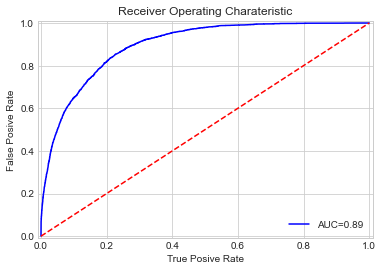

In [454]:
# 绘制ROC曲线
plot_roc_curve(y_test_bin, probs_gbt2)

## （十二）
## 总结
[回到顶部](#Index)

#### 对比最优算法的最好模型的结果

In [457]:
# 训练集准确度评分，对比连续型数据集和离散型数据集的最优模型
opti_models_acc_cv = pd.DataFrame({
    'Model': ['Random Forest - con', 'Gradient Boosting Trees - con',
              'Logistic Regression - bin', 'Gradient Boosting Trees - bin'],
    'Score': [acc_cv_rf, acc_cv_gbt,
              acc_cv_log, acc_cv_gbt2]
})
opti_models_acc_cv.sort_values(by='Score', ascending=False)

,Model,Score
1,Gradient Boosting Trees - con,87.05
0,Random Forest - con,86.16
3,Gradient Boosting Trees - bin,84.53
2,Logistic Regression - bin,84.37


In [458]:
# 测试集准确度评分，对比连续型数据集和离散型数据集的最优模型
opti_models_acc = pd.DataFrame({
    'Model': ['Random Forest - con', 'Gradient Boosting Trees - con',
              'Logistic Regression - bin', 'Gradient Boosting Trees - bin'],
    'Score': [acc_rf, acc_gbt,
              acc_log, acc_gbt2]
})
opti_models_acc.sort_values(by='Score', ascending=False)

,Model,Score
1,Gradient Boosting Trees - con,87.22
0,Random Forest - con,86.22
3,Gradient Boosting Trees - bin,84.46
2,Logistic Regression - bin,83.98


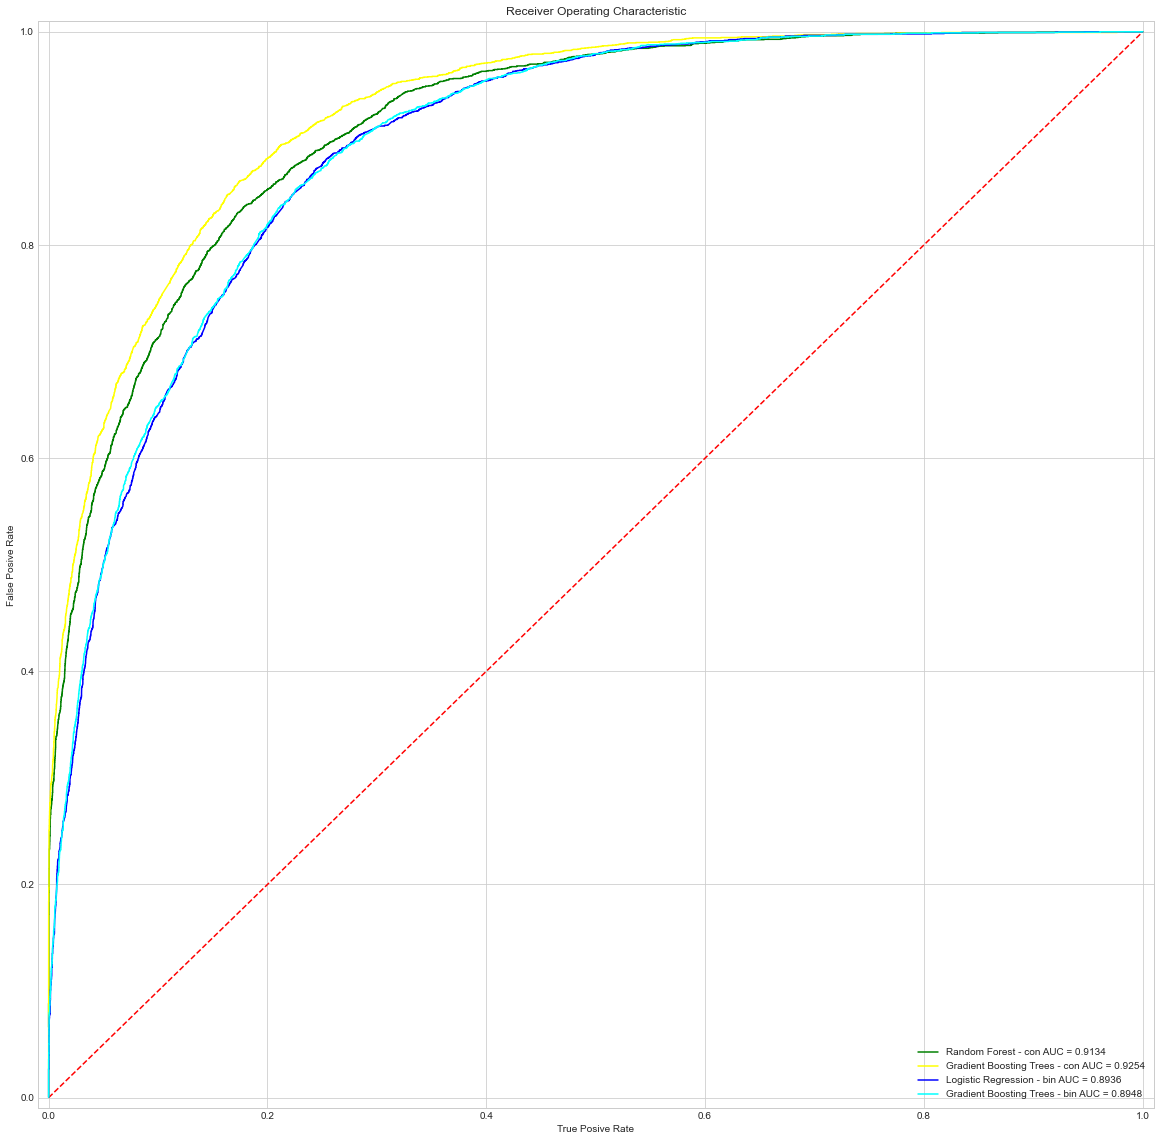

In [475]:
# 绘制不同模型ROC评分
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 20))
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('True Posive Rate')
plt.ylabel('False Posive Rate')


def plot_roc_curves_opti(y_test, prob, model, color):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label='{0} AUC = {1:.4f}'.format(
        model, roc_auc), color=color)
    plt.legend(loc='lower right')


plot_roc_curves_opti(y_test, probs_rf, 'Random Forest - con', 'green')
plot_roc_curves_opti(
    y_test, probs_gbt, 'Gradient Boosting Trees - con', 'yellow')
plot_roc_curves_opti(y_test_bin, probs_log,
                     'Logistic Regression - bin', 'blue')
plot_roc_curves_opti(y_test_bin, probs_gbt2,
                     'Gradient Boosting Trees - bin', 'cyan')
plt.show()

#### 结论：
- 从连续型数据集来看，随机森林算法经过参数调整，测试集的准确度从85.95提升到了86.22，有一些效果，而AUC面积从0.9123提升到了0.9134，仅仅微微地提升。
- 从连续型数据集来看，梯度提升算法经过参数调整，测试集的准确度从86.57提升到了87.22，调参有一定作用，而AUC面积从0.9199提升到了0.9254，调参有较好的效果。
- 从离散型数据集来看，逻辑回归算法经过参数调整，测试集的准确度从84.44下降到了83.98，调参起反作用，只能让训练集准确度微微提升，也说明模型有一些过拟合情况，而AUC面积从0.8963也下降到了0.8936。经过不只notebook上300多次计算，用也其它的随机种子算过，准确度的提升，没有超过0.1的。
- 从离散型数据集来看，梯度提升算法经过参数调整，测试集的准确度从84.42提升到了84.46，调参只有微弱效果，而AUC面积从0.8963下降到0.8948，调参起反作用。用其它随机种子计算之后，也没什么提升。
- 对比两个数据集训练出来的最优模型，连续型的两个最优模型比离散型的要好，连续型用6个不同算法的AUC总面积为5.1521，离散型用6个不同算法的AUC总面积为5.128，也是连续型数据的算法较好。说明合理的数据处理和特征选择，基本决定模型预测的上限，用离散型数据集训练的模型准确度都没有超过85，AUC面积也没有超过0.9的。以这个人口特征来预测收入等级的数据来看，特征保留连续数值、标签化比划分区间、独热编码化要好。
- 特征越多的数据集，用同样的算法在同样（默认）参数计算下，用时越多。
- 随机森林算法，在引入多颗树之后准确度就在较高（85%）水平，而调参、做各项剪枝策略在这个数据集中提升不大，可能是量不大的原因，无法发挥各项参数作用。
- 逻辑回归算法简单，计算量不是特别大，在样本规模不是很大，要求准确不是很高，但是要快速得到可接受的准确结果的情况下，逻辑回归算法是不错的选择。这四个最优模型中，本机计算只用9秒多，其它算法在12-17秒。
- 梯度提升算法在连续型数据集中，调参作用明显，而离散型数据中，调参作用不明显，也说明了数据预处理的对算法结果的影响；它对比随机森林，除了可以调调树的剪枝参数外，还可以调整学习率的参数，以达到比随机森林更优的结果，经过多颗树后而接近实际结果，而不仅仅是一群决策树的投票。在更大的数据集中，也能表现比随机森林更好。

[回到顶部](#Index)